## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis and Visualization with Python Part III</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Exploratory Data Analysis (EDA) Project</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">AutoScout Car Price Prediction EDA</p>



# PART- 3 `( Handling With Outliers )`

In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
# !pip install termcolor
from termcolor import colored
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
from scipy.stats.mstats import winsorize

In [2]:
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', df.shape[0]+1)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Read data in json form
df0 = pd.read_csv('auto_scout_2.csv')
# Make a copy
df = df0.copy()

# Show some records
df

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,engine_size,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,ES,16950.0,Compact,Used,5.0,Spain,Yes,120200.0,Manual,diesel,Black,Metallic,Dealer,5.0,1595.0,5.0,98.0,Front,4.0,5.4,Basic,Standard,18.0,1.0,1270.0,No,No,6.0,Cloth,2.0,high_efficiency,102.0,6.0
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,ES,80900.0,Compact,Pre-registered,4.0,Spain,Yes,5000.0,Automatic,electric,Black,Nonmetallic,Dealer,5.0,1.0,9.0,0.0,4WD,4.0,5.0,Basic,Standard,24.0,6.0,2355.0,No,No,6.0,Full leather,1.0,high_efficiency,292.0,0.0
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,ES,69900.0,Compact,Used,5.0,Spain,Yes,18900.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,1991.0,8.0,162.0,4WD,4.0,8.4,Basic,Standard,6.0,1.0,1555.0,No,No,6.0,Full leather,2.0,low_efficiency,421.0,2.0
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,A 35 AMG,ES,46990.0,Compact,Used,5.0,Spain,Yes,18995.0,Automatic,benzine,Yellow,Nonmetallic,Dealer,5.0,1991.0,7.0,169.0,4WD,4.0,7.3,Basic,Standard,5.0,1.0,1455.0,No,No,6.0,Full leather,2.0,low_efficiency,306.0,2.0
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,ES,16800.0,Compact,Used,5.0,Spain,Yes,197000.0,Automatic,diesel,White,Metallic,Dealer,5.0,2143.0,7.0,162.0,4WD,4.0,4.9,Basic,Standard,6.0,1.0,1545.0,No,No,6.0,Full leather,2.0,low_efficiency,136.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28625,Volvo S90,Volvo,S90,ES,37600.0,Sedan,Used,4.0,Spain,Yes,40345.0,Automatic,electric,Black,Nonmetallic,Dealer,4.0,1969.0,8.0,46.0,4WD,4.0,2.0,Basic,Standard,8.0,1.0,2077.0,No,No,6.0,Full leather,2.0,high_efficiency,392.0,3.0
28626,Volvo S40,Volvo,S40,NL,5499.0,Sedan,Used,4.0,Spain,No,145000.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,2435.0,5.0,217.0,Front,5.0,9.1,Basic,Standard,10.0,2.0,1357.0,Yes,No,4.0,Cloth,3.0,high_efficiency,170.0,18.0
28627,Volvo C30,Volvo,C30,BE,7300.0,Sedan,Used,3.0,Belgium,Yes,96000.0,Manual,diesel,Grey,Metallic,Dealer,4.0,1560.0,6.0,99.0,Front,4.0,3.8,Basic,Standard,15.0,3.0,1356.0,Yes,No,5.0,Cloth,1.0,low_efficiency,114.0,11.0
28628,Volvo S90,Volvo,S90,NL,29900.0,Sedan,Used,4.0,Spain,Yes,94343.0,Automatic,benzine,Blue,Metallic,Dealer,5.0,1969.0,8.0,149.0,4WD,4.0,6.5,Basic,Standard,9.0,2.0,1617.0,Yes,No,6.0,Full leather,1.0,high_efficiency,254.0,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   make                     28630 non-null  object 
 2   model                    28630 non-null  object 
 3   location                 28630 non-null  object 
 4   price                    28630 non-null  float64
 5   body_type                28630 non-null  object 
 6   type                     28630 non-null  object 
 7   doors                    28630 non-null  float64
 8   country_version          28630 non-null  object 
 9   warranty                 28630 non-null  object 
 10  mileage                  28630 non-null  float64
 11  gearbox                  28630 non-null  object 
 12  fuel_type                28630 non-null  object 
 13  colour                   28630 non-null  object 
 14  paint                 

<Axes: >

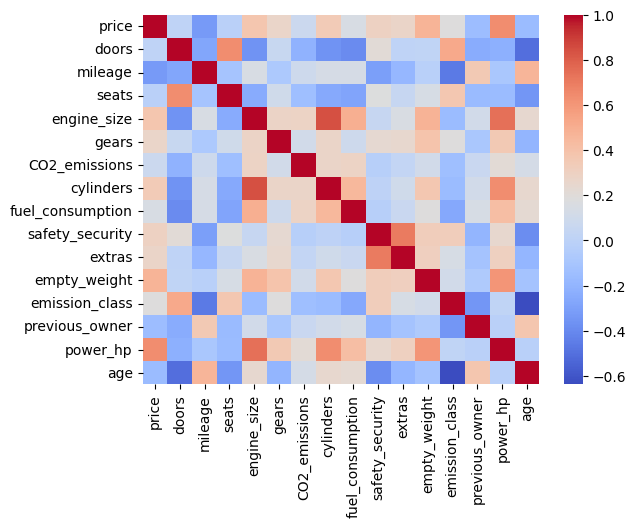

In [5]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm')

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24707 entries, 0 to 28629
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               24707 non-null  object 
 1   make                     24707 non-null  object 
 2   model                    24707 non-null  object 
 3   location                 24707 non-null  object 
 4   price                    24707 non-null  float64
 5   body_type                24707 non-null  object 
 6   type                     24707 non-null  object 
 7   doors                    24707 non-null  float64
 8   country_version          24707 non-null  object 
 9   warranty                 24707 non-null  object 
 10  mileage                  24707 non-null  float64
 11  gearbox                  24707 non-null  object 
 12  fuel_type                24707 non-null  object 
 13  colour                   24707 non-null  object 
 14  paint                    24

# Numeric Features

### price is our target value

In [8]:
df.price.describe()

count     24707.000000
mean      23813.556199
std       25010.792458
min         490.000000
25%       11900.000000
50%       18650.000000
75%       28490.000000
max      999999.000000
Name: price, dtype: float64

<Axes: >

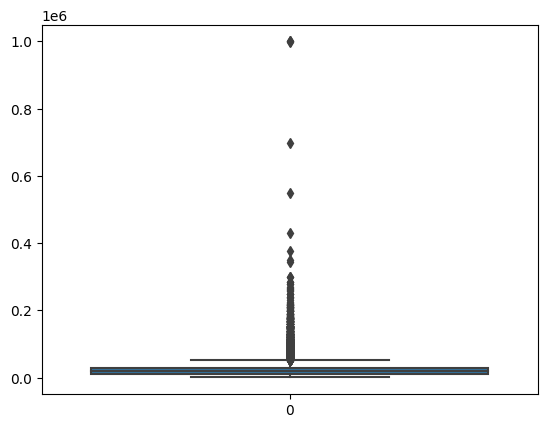

In [9]:
sns.boxplot(df.price)

In [10]:
df = df[~(df.price>150000)]

In [11]:
df.loc[df.price > 80000, 'price']  = winsorize(df["price"],(None, len(df.price[df.price > 80000]) / len(df)),inplace=True)

In [12]:
df = df[~(df.price < 500)]

### doors 

In [13]:
df.doors.value_counts()

doors
5.0    14837
2.0     4846
4.0     2758
3.0     2133
6.0        5
1.0        2
Name: count, dtype: int64

In [14]:
df.loc[df['doors'] ==1, 'doors'] = 2

In [15]:
df.loc[df['doors'] ==6, 'doors'] = 5

<Axes: >

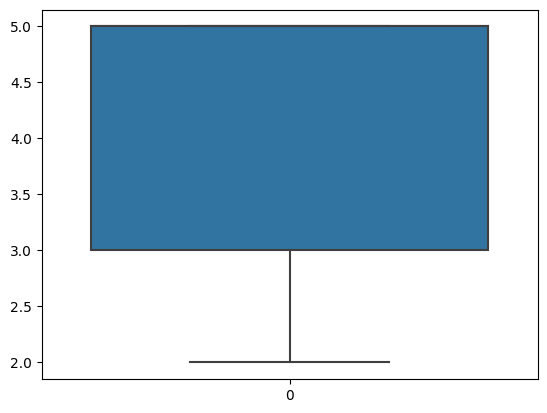

In [16]:
sns.boxplot(df.doors)

### mileage

In [17]:
df.mileage.sort_values(ascending=False)

18873    1440000.0
17324    1300000.0
12169    1199900.0
22889    1000001.0
7684     1000000.0
           ...    
16374          0.0
18363          0.0
14796          0.0
22929          0.0
11444          0.0
Name: mileage, Length: 24581, dtype: float64

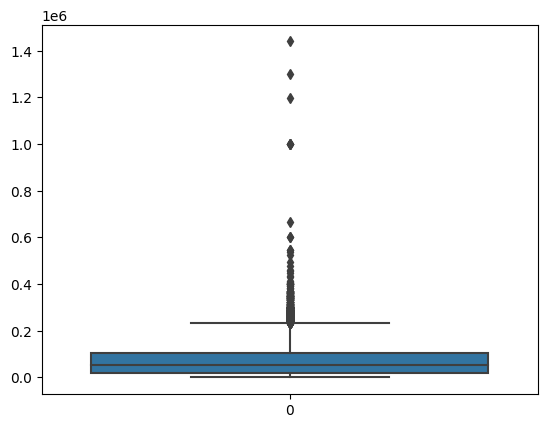

In [18]:
sns.boxplot(df.mileage);

In [19]:
df.mileage.mean()

71368.99190431634

In [20]:
df[df.mileage>350000].mileage.count()

60

In [21]:
df = df[~(df.mileage>350000)]

### seats

In [22]:
df.seats.value_counts()

seats
5.0     17769
4.0      5106
2.0      1102
7.0       412
8.0        43
9.0        35
3.0        25
6.0        12
0.0         9
1.0         6
17.0        2
Name: count, dtype: int64

In [23]:
df.loc[df['seats'] == 0, 'seats'] = 5

In [24]:
df.seats.value_counts()

seats
5.0     17778
4.0      5106
2.0      1102
7.0       412
8.0        43
9.0        35
3.0        25
6.0        12
1.0         6
17.0        2
Name: count, dtype: int64

In [25]:
df.loc[df['seats'] == 1,'seats'] = 4

In [26]:
df[df['seats'] == 8]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,engine_size,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
1498,Mercedes-Benz G 230,Mercedes-Benz,G 230,DE,28800.0,Off-Road/Pick-up,Used,2.0,Germany,No,113100.0,Automatic,benzine,Grey,Nonmetallic,Dealer,8.0,2297.0,4.0,0.0,4WD,4.0,0.0,Standard,Standard,1.0,2.0,1395.0,No,Yes,2.0,Full leather,1.0,high_efficiency,116.0,29.0
1519,Mercedes-Benz G 230,Mercedes-Benz,G 230,DE,28900.0,Off-Road/Pick-up,Used,2.0,Germany,No,86500.0,Automatic,benzine,Green,Nonmetallic,Dealer,8.0,2297.0,4.0,0.0,4WD,4.0,0.0,Standard,Standard,1.0,2.0,1395.0,No,Yes,2.0,Full leather,1.0,high_efficiency,116.0,28.0
1807,Mercedes-Benz Vito,Mercedes-Benz,Vito,DE,31690.0,Station wagon,Used,4.0,Germany,Yes,57043.0,Manual,diesel,Blue,Nonmetallic,Dealer,8.0,2143.0,6.0,158.0,Front,4.0,6.0,Basic,Standard,14.0,2.0,1395.0,No,No,6.0,Cloth,1.0,high_efficiency,163.0,6.0
4128,Opel Zafira Life,Opel,Zafira Life,DE,42977.0,Station wagon,Used,4.0,Germany,Yes,31850.0,Automatic,diesel,Black,Metallic,Dealer,8.0,1997.0,6.0,196.0,Front,4.0,7.5,Basic,Standard,17.0,4.0,1838.0,No,Yes,6.0,Cloth,1.0,low_efficiency,177.0,2.0
4154,Opel Zafira Life,Opel,Zafira Life,DE,41977.0,Station wagon,Used,4.0,Germany,Yes,34100.0,Automatic,diesel,Black,Metallic,Dealer,8.0,1997.0,6.0,195.0,Front,4.0,7.4,Basic,Standard,17.0,3.0,1838.0,No,Yes,6.0,Cloth,1.0,low_efficiency,177.0,2.0
4164,Opel Zafira Life,Opel,Zafira Life,DE,39850.0,Station wagon,Used,5.0,Germany,No,39000.0,Manual,diesel,White,Nonmetallic,Dealer,8.0,1997.0,6.0,142.0,Front,4.0,5.4,Basic,Standard,27.0,5.0,1838.0,No,No,6.0,Cloth,2.0,low_efficiency,150.0,2.0
4279,Opel Zafira Life,Opel,Zafira Life,DE,37490.0,Station wagon,Used,4.0,Germany,Yes,84250.0,Manual,diesel,Silver,Metallic,Dealer,8.0,1997.0,6.0,142.0,Front,4.0,5.4,Basic,Standard,19.0,6.0,1735.0,Yes,Yes,6.0,Cloth,1.0,high_efficiency,150.0,2.0
6345,Renault Trafic,Renault,Trafic,DE,16300.0,Station wagon,Used,4.0,Germany,No,98100.0,Manual,diesel,Blue,Nonmetallic,Dealer,8.0,1995.0,6.0,228.0,Front,4.0,8.6,Basic,Standard,6.0,1.0,2045.0,Yes,Yes,5.0,Cloth,2.0,high_efficiency,114.0,9.0
6367,Renault Trafic,Renault,Trafic,DE,22890.0,Station wagon,Used,4.0,Germany,No,93313.0,Manual,diesel,White,Nonmetallic,Dealer,8.0,1598.0,6.0,167.0,Front,4.0,6.3,Basic,Standard,9.0,1.0,2045.0,No,No,6.0,Cloth,1.0,high_efficiency,95.0,6.0
6465,Renault Trafic,Renault,Trafic,DE,21750.0,Station wagon,Used,4.0,Germany,No,111000.0,Manual,diesel,Black,Metallic,Dealer,8.0,1598.0,6.0,170.0,Front,4.0,6.4,Basic,Standard,12.0,2.0,1882.0,Yes,Yes,6.0,Cloth,1.0,high_efficiency,145.0,6.0


In [27]:
df[df['seats'] == 17]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,engine_size,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
4294,Opel Movano,Opel,Movano,DE,59990.0,Station wagon,Used,5.0,Germany,No,290.0,Manual,diesel,Blue,Nonmetallic,Dealer,17.0,2299.0,6.0,124.0,Rear,4.0,5.0,Basic,Standard,8.0,1.0,1280.0,Yes,Yes,6.0,Cloth,1.0,high_efficiency,163.0,0.0
4299,Opel Movano,Opel,Movano,DE,59990.0,Station wagon,Used,5.0,Germany,No,300.0,Manual,diesel,Blue,Nonmetallic,Dealer,17.0,2299.0,6.0,124.0,Rear,4.0,5.0,Basic,Standard,8.0,1.0,1280.0,Yes,Yes,6.0,Cloth,1.0,high_efficiency,163.0,0.0


In [28]:
df = df[~(df['seats'] == 17)]

<Axes: >

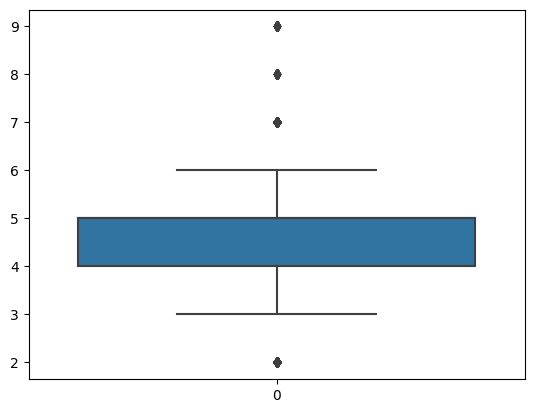

In [29]:
sns.boxplot(df.seats)

### engine_size

In [30]:
df.engine_size.sort_values(ascending=False)

21667    8660.0
21797    6653.0
21653    6400.0
21345    6400.0
21393    6387.0
          ...  
7116        0.0
18785       0.0
4952        0.0
7113        0.0
18964       0.0
Name: engine_size, Length: 24519, dtype: float64

<Axes: >

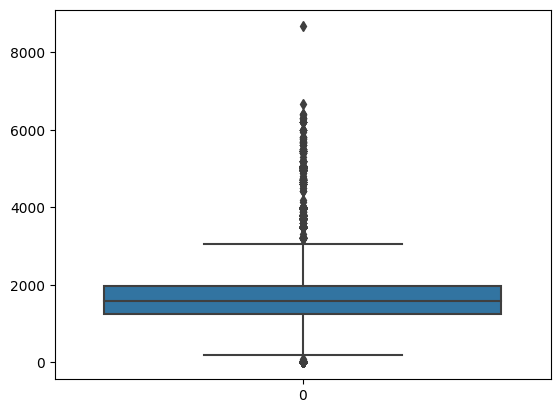

In [31]:
sns.boxplot(df.engine_size)

<Axes: xlabel='power_hp', ylabel='engine_size'>

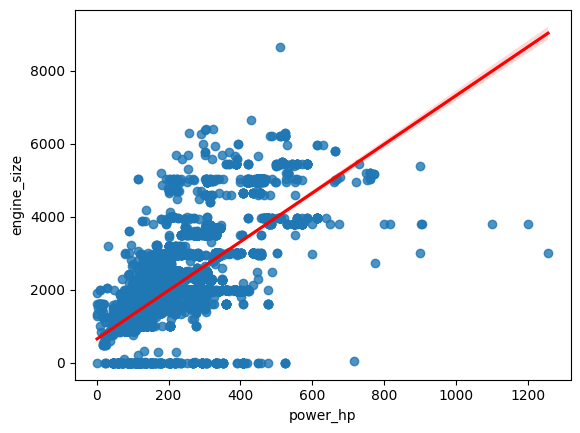

In [32]:
sns.regplot(x=df.power_hp,y=df.engine_size,scatter=True, ci=95, line_kws={"color": "red"})

In [33]:
df.drop('engine_size', axis=1, inplace=True)

### gears

In [34]:
df.gears.value_counts(dropna=False)

gears
6.0     11267
5.0      6621
7.0      2220
8.0      1777
1.0      1123
9.0      1028
4.0       296
10.0      101
3.0        54
0.0        29
2.0         3
Name: count, dtype: int64

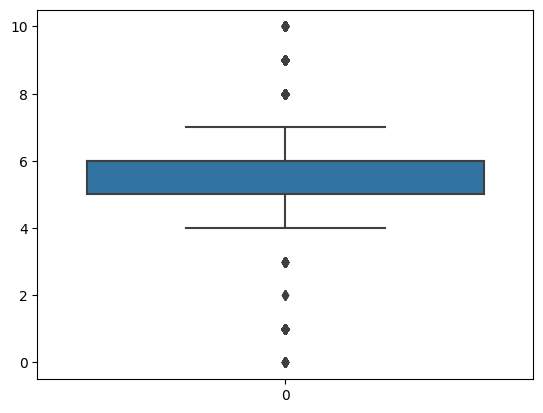

In [35]:
sns.boxplot(df.gears);

In [36]:
df[(df.gears==1)&(df.fuel_type=='electric')]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
1213,Mercedes-Benz EQA,Mercedes-Benz,EQA,BE,58900.0,Off-Road/Pick-up,Used,5.0,Belgium,Yes,6010.0,Automatic,electric,Grey,Metallic,Dealer,5.0,1.0,0.0,Front,1.0,5.0,Basic,Standard,22.0,12.0,2040.0,No,No,6.0,Part leather,1.0,high_efficiency,190.0,1.0
1226,Mercedes-Benz EQC 400,Mercedes-Benz,EQC 400,ES,80000.0,Off-Road/Pick-up,Pre-registered,5.0,Spain,Yes,10.0,Automatic,electric,Blue,Nonmetallic,Dealer,5.0,1.0,0.0,4WD,1.0,5.0,Basic,Standard,7.0,1.0,2495.0,No,No,6.0,Part leather,1.0,high_efficiency,408.0,0.0
1271,Mercedes-Benz EQC 400,Mercedes-Benz,EQC 400,ES,64900.0,Off-Road/Pick-up,Used,5.0,Spain,Yes,45000.0,Automatic,electric,Silver,Nonmetallic,Dealer,5.0,1.0,0.0,4WD,1.0,5.0,Basic,Standard,7.0,1.0,2495.0,No,No,6.0,Part leather,1.0,high_efficiency,408.0,3.0
1273,Mercedes-Benz EQC 400,Mercedes-Benz,EQC 400,BE,79900.0,Off-Road/Pick-up,Used,5.0,Belgium,Yes,10000.0,Automatic,electric,Black,Metallic,Dealer,5.0,1.0,0.0,4WD,1.0,5.0,Basic,Standard,27.0,8.0,2495.0,No,Yes,6.0,Full leather,1.0,high_efficiency,408.0,2.0
1281,Mercedes-Benz EQB 350,Mercedes-Benz,EQB 350,DE,67790.0,Off-Road/Pick-up,Demonstration,5.0,Germany,Yes,9900.0,Automatic,electric,Black,Metallic,Dealer,7.0,1.0,0.0,4WD,4.0,5.0,Basic,Standard,26.0,7.0,2175.0,Yes,Yes,6.0,Other,1.0,high_efficiency,292.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26746,Volvo C40,Volvo,C40,DE,67990.0,Off-Road/Pick-up,Used,5.0,Germany,No,2000.0,Automatic,electric,Blue,Metallic,Dealer,5.0,1.0,124.0,4WD,0.0,5.0,Basic,Standard,24.0,7.0,2207.0,No,Yes,6.0,alcantara,1.0,high_efficiency,408.0,0.0
26779,Volvo XC40,Volvo,XC40,DE,66920.0,Off-Road/Pick-up,Demonstration,5.0,Germany,Yes,15990.0,Automatic,electric,Green,Metallic,Dealer,5.0,1.0,41.0,4WD,3.0,5.0,Basic,Standard,26.0,5.0,2220.0,Yes,Yes,6.0,Full leather,1.0,high_efficiency,408.0,1.0
26835,Volvo,Volvo,,DE,68890.0,Off-Road/Pick-up,Demonstration,5.0,Germany,No,3500.0,Automatic,electric,Blue,Metallic,Dealer,5.0,1.0,212.0,4WD,4.0,8.9,Basic,Standard,23.0,3.0,2207.0,Yes,Yes,4.0,alcantara,1.0,high_efficiency,408.0,0.0
26990,Volvo XC40,Volvo,XC40,DE,68990.0,Off-Road/Pick-up,Demonstration,5.0,Germany,Yes,10000.0,Automatic,electric,Green,Metallic,Dealer,5.0,1.0,41.0,4WD,3.0,5.0,Basic,Standard,30.0,14.0,2220.0,Yes,Yes,6.0,Full leather,1.0,high_efficiency,408.0,2.0


In [37]:
df[df.gears==0]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
1177,Mercedes-Benz E 300,Mercedes-Benz,E 300,BE,47500.0,Coupe,Used,5.0,Germany,Yes,63096.0,Automatic,diesel,Silver,Metallic,Dealer,5.0,0.0,140.0,Rear,4.0,6.8,Basic,Standard,11.0,8.0,1785.0,No,Yes,6.0,Full leather,1.0,high_efficiency,245.0,3.0
1396,Mercedes-Benz GLS 400,Mercedes-Benz,GLS 400,BE,80000.0,Off-Road/Pick-up,Used,5.0,Germany,Yes,79349.0,Automatic,diesel,Black,Metallic,Dealer,7.0,0.0,208.0,4WD,6.0,7.4,Basic,Standard,15.0,8.0,2505.0,No,Yes,6.0,Full leather,1.0,high_efficiency,330.0,2.0
5122,Renault ZOE,Renault,ZOE,DE,21988.0,Compact,Used,5.0,Germany,No,55673.0,Automatic,electric,Grey,Metallic,Dealer,5.0,0.0,0.0,Front,0.0,5.0,Basic,Standard,12.0,2.0,1575.0,No,No,6.0,Cloth,1.0,high_efficiency,109.0,3.0
6211,Renault Kadjar,Renault,Kadjar,DE,21788.0,Off-Road/Pick-up,Used,5.0,Germany,No,40000.0,Automatic,benzine,Blue,Metallic,Dealer,5.0,0.0,154.0,Front,4.0,5.9,Basic,Standard,16.0,4.0,1437.0,No,No,6.0,Cloth,1.0,low_efficiency,159.0,2.0
9102,Peugeot Partner,Peugeot,Partner,BE,14990.0,Station wagon,Used,5.0,Belgium,Yes,60926.0,Manual,electric,Grey,Metallic,Dealer,5.0,0.0,1.0,Front,4.0,4.4,Basic,Standard,6.0,2.0,1480.0,Yes,Yes,6.0,Cloth,1.0,high_efficiency,67.0,4.0
9770,Fiat 500,Fiat,500,DE,27765.0,Compact,Used,3.0,Spain,No,11100.0,Automatic,electric,White,Nonmetallic,Dealer,4.0,0.0,88.0,Front,0.0,3.9,Basic,Standard,14.0,2.0,1365.0,No,No,6.0,Cloth,1.0,high_efficiency,118.0,1.0
12801,SEAT Tarraco,SEAT,Tarraco,DE,33788.0,Off-Road/Pick-up,Used,5.0,Germany,No,9730.0,Automatic,diesel,Grey,Metallic,Dealer,5.0,0.0,186.0,4WD,4.0,5.6,Basic,Standard,18.0,5.0,1803.0,No,No,6.0,Cloth,1.0,high_efficiency,150.0,3.0
15106,Skoda Octavia,Skoda,Octavia,DE,36488.0,Sedan,Pre-registered,5.0,European Union,No,10.0,Automatic,benzine,Grey,Metallic,Dealer,5.0,0.0,129.0,Front,4.0,6.5,Basic,Standard,16.0,5.0,1520.0,Yes,No,6.0,Cloth,1.0,low_efficiency,245.0,0.0
17930,Toyota C-HR,Toyota,C-HR,IT,18950.0,Off-Road/Pick-up,Used,5.0,Germany,Yes,96167.0,Automatic,electric,Black,Metallic,Dealer,5.0,0.0,92.0,Front,4.0,4.0,Basic,Standard,10.0,1.0,1485.0,No,No,6.0,Cloth,3.0,high_efficiency,122.0,4.0
17945,Toyota C-HR,Toyota,C-HR,IT,32800.0,Off-Road/Pick-up,Demonstration,5.0,Germany,No,19800.0,Automatic,electric,Grey,Metallic,Dealer,5.0,0.0,92.0,Front,4.0,4.0,Basic,Standard,8.0,3.0,1485.0,No,No,6.0,Part leather,1.0,high_efficiency,184.0,1.0


In [38]:
for group in df.loc[df.gears == 0, 'make_model'].unique():
    for group2 in df.loc[df.gears == 0, 'body_type'].unique():
        cond = df['make_model'] == group
        cond2 = df['body_type'] == group2
        mode = list(df[cond]['gears'].mode())
        mode2 = list(df[cond2]['gears'].mode())
        if mode != []:
            df.loc[cond, 'gears'] = df.loc[cond,'gears'].mode()[0]
        elif mode2 != []:
            df.loc[cond, 'gears'] = df.loc[cond2,'gears'].mode()[0]
        else:
            df.loc[cond, 'gears'] = df['gears'].mode()[0]

In [39]:
df.loc[(df.make_model=='Hyundai Excel')&(df.gearbox=='Manual'),'gears'] = 6
df.loc[(df.make_model=='Hyundai Excel')&(df.gearbox=='Automatic'),'gears'] = 6

In [40]:
df = df[~(df.gears==2)]

In [41]:
df[df.gears==10]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
20967,Ford Bronco,Ford,Bronco,IT,80000.0,Compact,Pre-registered,5.0,Germany,No,2.0,Automatic,benzine,Orange,Metallic,Dealer,5.0,10.0,238.0,4WD,4.0,10.0,Basic,Standard,4.0,2.0,2146.0,No,No,6.0,Velour,1.0,low_efficiency,271.0,0.0
21935,Ford Explorer,Ford,Explorer,DE,47000.0,Off-Road/Pick-up,Used,5.0,Germany,No,8000.0,Automatic,benzine,Black,Nonmetallic,Dealer,7.0,10.0,280.0,4WD,6.0,11.8,Basic,Standard,24.0,6.0,2466.0,Yes,No,6.0,Full leather,1.0,low_efficiency,400.0,1.0
21944,Ford Explorer,Ford,Explorer,ES,61490.0,Off-Road/Pick-up,Used,4.0,Spain,Yes,30000.0,Automatic,electric,Blue,Metallic,Dealer,7.0,10.0,66.0,4WD,6.0,3.1,Basic,Standard,28.0,15.0,2466.0,No,No,6.0,Full leather,2.0,high_efficiency,450.0,2.0
21947,Ford Explorer,Ford,Explorer,ES,57490.0,Off-Road/Pick-up,Used,5.0,Spain,Yes,35000.0,Automatic,benzine,Grey,Nonmetallic,Dealer,7.0,10.0,200.0,4WD,6.0,2.9,Basic,Standard,28.0,15.0,2466.0,No,No,6.0,Full leather,2.0,high_efficiency,450.0,2.0
21980,Ford Explorer,Ford,Explorer,DE,54500.0,Off-Road/Pick-up,Used,5.0,Germany,No,4200.0,Automatic,benzine,Blue,Metallic,Dealer,7.0,10.0,200.0,4WD,6.0,10.5,Basic,Standard,20.0,7.0,2466.0,Yes,No,6.0,Full leather,1.0,low_efficiency,318.0,0.0
21989,Ford F 150,Ford,F 150,DE,80000.0,Off-Road/Pick-up,Used,4.0,Germany,No,25610.0,Automatic,benzine,Blue,Nonmetallic,Dealer,5.0,10.0,282.0,4WD,4.0,12.5,Basic,Standard,24.0,12.0,2530.0,Yes,Yes,6.0,Full leather,1.0,low_efficiency,457.0,3.0
21995,Ford Explorer,Ford,Explorer,DE,68950.0,Off-Road/Pick-up,Used,4.0,Germany,Yes,23451.0,Automatic,electric,Black,Metallic,Dealer,7.0,10.0,66.0,4WD,6.0,2.9,Basic,Standard,25.0,14.0,2466.0,Yes,Yes,6.0,Full leather,1.0,high_efficiency,457.0,1.0
22031,Ford Explorer,Ford,Explorer,DE,63340.0,Off-Road/Pick-up,Used,5.0,Germany,No,24640.0,Automatic,electric,Silver,Metallic,Dealer,7.0,10.0,66.0,4WD,6.0,2.9,Basic,Standard,28.0,13.0,2466.0,Yes,Yes,6.0,Full leather,2.0,high_efficiency,457.0,2.0
22036,Ford F 150,Ford,F 150,DE,80000.0,Off-Road/Pick-up,Used,4.0,Germany,No,200.0,Automatic,benzine,Grey,Metallic,Dealer,5.0,10.0,282.0,4WD,6.0,12.5,Basic,Standard,16.0,5.0,2530.0,Yes,No,6.0,Part leather,1.0,low_efficiency,405.0,0.0
22053,Ford Explorer,Ford,Explorer,DE,64240.0,Off-Road/Pick-up,Used,5.0,Germany,No,24820.0,Automatic,electric,Silver,Metallic,Dealer,7.0,10.0,66.0,4WD,6.0,2.9,Basic,Standard,28.0,14.0,2466.0,Yes,Yes,6.0,Full leather,2.0,high_efficiency,457.0,2.0


### age

In [42]:
df.age.value_counts(dropna=False)

age
 3.0      3117
 4.0      2790
 0.0      2751
 1.0      2574
 2.0      2162
          ... 
-180.0       1
 70.0        1
 72.0        1
 94.0        1
 69.0        1
Name: count, Length: 82, dtype: int64

<Axes: >

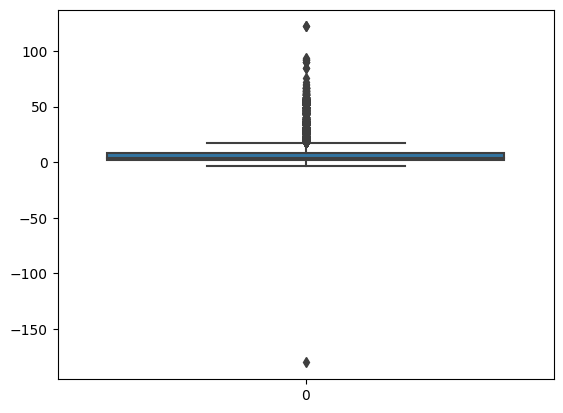

In [43]:
sns.boxplot(df.age)

In [44]:
df.loc[(df.make =='Hyundai')&(df.age >100),'age'] = 2

In [45]:
df = df[~(df.age>50)]

In [46]:
df = df[~(df.age<0)]

In [47]:
df.loc[df['age'] >40, 'age']= winsorize(df["age"],(None, len(df.age[df.age>40]) / len(df)),inplace=True)

### CO2_emissions

<Axes: >

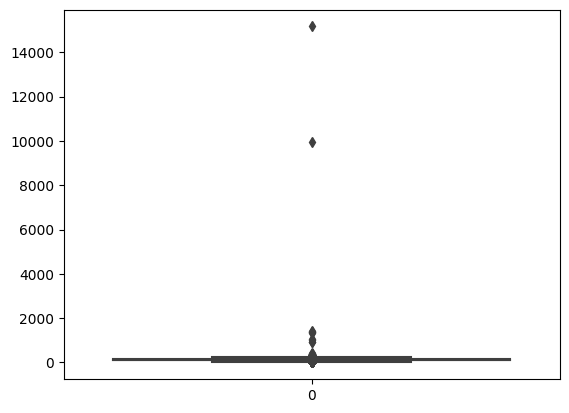

In [48]:
sns.boxplot(df.CO2_emissions)

In [49]:
df.CO2_emissions.sort_values(ascending=False)

9901     15168.0
20888     9954.0
18042     1410.0
10177     1390.0
4557      1360.0
          ...   
20895        0.0
9968         0.0
13637        0.0
13638        0.0
23613        0.0
Name: CO2_emissions, Length: 24283, dtype: float64

In [50]:
df.loc[(df.CO2_emissions == 0)&(df.fuel_type != 'electric')]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
58,Mercedes-Benz A 250,Mercedes-Benz,A 250,DE,44785.0,Compact,Used,5.0,Germany,Yes,9000.0,Automatic,benzine,Red,Metallic,Dealer,5.0,8.0,0.0,Front,4.0,0.0,Basic,Standard,21.0,9.0,1700.0,Yes,Yes,6.0,Other,2.0,high_efficiency,235.0,2.0
98,Mercedes-Benz AMG GT,Mercedes-Benz,AMG GT,NL,80000.0,Compact,Used,5.0,Germany,Yes,5147.0,Automatic,benzine,Black,Metallic,Dealer,4.0,7.0,0.0,4WD,6.0,9.3,Basic,Standard,15.0,6.0,1940.0,Yes,No,6.0,Full leather,1.0,low_efficiency,368.0,1.0
103,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,NL,39495.0,Compact,Used,5.0,Spain,No,54510.0,Automatic,benzine,Grey,Metallic,Dealer,5.0,7.0,0.0,4WD,4.0,6.9,Basic,Standard,16.0,5.0,1455.0,Yes,No,6.0,Full leather,1.0,low_efficiency,381.0,5.0
136,Mercedes-Benz A 200,Mercedes-Benz,A 200,NL,26900.0,Compact,Used,5.0,Spain,Yes,139719.0,Automatic,diesel,Black,Metallic,Dealer,5.0,7.0,0.0,Front,4.0,4.8,Basic,Standard,13.0,1.0,1290.0,Yes,No,6.0,Part leather,1.0,high_efficiency,150.0,3.0
152,Mercedes-Benz A 200,Mercedes-Benz,A 200,NL,19950.0,Compact,Used,5.0,Spain,No,189278.0,Automatic,diesel,Grey,Metallic,Dealer,5.0,7.0,0.0,Front,4.0,3.8,Basic,Standard,18.0,4.0,1345.0,Yes,No,6.0,Full leather,2.0,high_efficiency,136.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28310,Volvo S90,Volvo,S90,DE,60970.0,Sedan,Employee's car,4.0,Spain,Yes,11400.0,Automatic,benzine,White,Metallic,Dealer,5.0,8.0,0.0,4WD,4.0,4.8,Basic,Standard,23.0,3.0,1892.0,No,Yes,6.0,alcantara,1.0,high_efficiency,392.0,1.0
28316,Volvo S80,Volvo,S80,DE,2500.0,Sedan,Used,4.0,Germany,No,188000.0,Automatic,benzine,Silver,Metallic,Dealer,5.0,6.0,0.0,Front,5.0,11.9,Basic,Standard,11.0,3.0,1710.0,No,Yes,3.0,Cloth,1.0,high_efficiency,140.0,22.0
28334,Volvo S90,Volvo,S90,DE,36890.0,Sedan,Used,4.0,Spain,No,52083.0,Automatic,diesel,Grey,Metallic,Dealer,5.0,8.0,0.0,4WD,4.0,4.8,Basic,Standard,22.0,1.0,1892.0,No,No,6.0,Full leather,1.0,high_efficiency,235.0,4.0
28410,Volvo V40 Cross Country,Volvo,V40 Cross Country,DE,21880.0,Sedan,Used,5.0,Germany,Yes,13000.0,Manual,diesel,Grey,Metallic,Dealer,5.0,6.0,0.0,Front,4.0,0.0,Basic,Standard,18.0,7.0,1360.0,Yes,No,6.0,Cloth,2.0,high_efficiency,120.0,4.0


In [51]:
for group in list(df.loc[(df.CO2_emissions == 0)&(df.fuel_type!= 'electric'),'make_model'].unique()):
    cond = (df['make_model'] == group)# & (df.CO2_emissions == 0)
    mode = list(df[cond]['CO2_emissions'].mode())
    if (mode != []) and (mode != [0]):
        df.loc[cond, 'CO2_emissions'] = df[cond]['CO2_emissions'].mode()[0]
    else:
        df.loc[cond, 'CO2_emissions'] = df['CO2_emissions'].mean()

In [52]:
median = df['CO2_emissions'].median()
df.loc[(df.CO2_emissions == 0)&(df.fuel_type!= 'electric'),'CO2_emissions'] = median

In [53]:
df = df[~(df.CO2_emissions >= 375)]

### cylinders

In [54]:
df.cylinders.value_counts()

cylinders
4.0     17065
3.0      4339
6.0      1187
8.0       731
5.0       531
0.0       215
1.0        98
2.0        98
12.0       10
7.0         5
26.0        1
16.0        1
Name: count, dtype: int64

<Axes: >

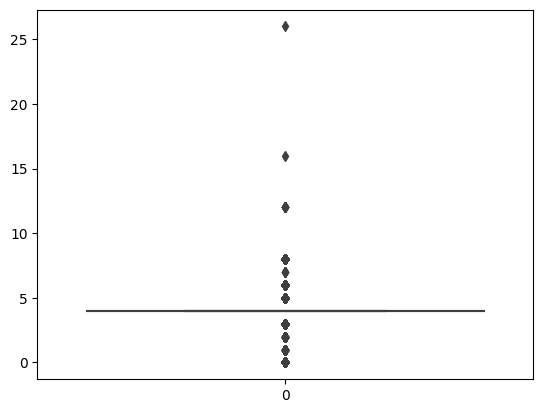

In [55]:
sns.boxplot(df.cylinders)

In [56]:
df.loc[(df.cylinders==16),'cylinders'] = 4

In [57]:
df.loc[(df.cylinders==26),'cylinders'] = 4

In [58]:
df.loc[(df.cylinders==7)]#,'cylinders'] = 4

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
5612,Renault Arkana,Renault,Arkana,FR,27550.0,Coupe,Used,5.0,Germany,No,12.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,7.0,132.5,Front,7.0,5.4,Basic,Standard,8.0,5.0,1411.0,No,No,6.0,Part leather,1.0,high_efficiency,140.0,0.0
5615,Renault Arkana,Renault,Arkana,FR,27850.0,Coupe,Used,5.0,Germany,No,8197.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,7.0,132.5,Front,7.0,5.4,Basic,Standard,8.0,5.0,1411.0,No,No,6.0,Part leather,1.0,high_efficiency,140.0,0.0
5624,Renault Arkana,Renault,Arkana,FR,28750.0,Coupe,Used,5.0,Germany,No,1886.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,7.0,132.5,Front,7.0,5.4,Basic,Standard,8.0,5.0,1411.0,No,No,6.0,Part leather,1.0,high_efficiency,140.0,0.0
6560,Renault Grand Scenic,Renault,Grand Scenic,FR,9390.0,Station wagon,Used,5.0,Spain,No,122700.0,Manual,diesel,Black,Nonmetallic,Dealer,5.0,6.0,118.0,Front,7.0,4.5,Basic,Standard,18.0,1.0,1430.0,No,No,6.0,Cloth,9.0,high_efficiency,131.0,7.0
21324,Ford Mustang,Ford,Mustang,NL,22500.0,Convertible,Used,2.0,Spain,No,66500.0,Automatic,benzine,Blue,Metallic,Private seller,4.0,6.0,276.0,Rear,7.0,10.0,Basic,Standard,7.0,5.0,1800.0,No,Yes,6.0,Part leather,2.0,low_efficiency,450.0,16.0


In [59]:
df.loc[(df.cylinders==7)&(df.make_model=='Renault Arkana'),'cylinders'] = 4
df.loc[(df.cylinders==7)&(df.make_model=='Renault Grand Scenic'),'cylinders'] = 4

In [60]:
df.loc[(df.cylinders==12)]#,'cylinders'] = 4

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
604,Mercedes-Benz SL 600,Mercedes-Benz,SL 600,DE,64890.0,Convertible,Used,2.0,Germany,No,56744.0,Automatic,benzine,Silver,Metallic,Dealer,2.0,5.0,330.0,Rear,12.0,13.9,Basic,Standard,19.0,6.0,1950.0,No,No,5.0,Full leather,2.0,low_efficiency,517.0,14.0
684,Mercedes-Benz SL 600,Mercedes-Benz,SL 600,NL,39950.0,Convertible,Used,2.0,Germany,No,82700.0,Automatic,benzine,Blue,Metallic,Dealer,2.0,4.0,330.0,Rear,12.0,0.0,Basic,Standard,19.0,1.0,1950.0,Yes,No,1.0,Full leather,1.0,low_efficiency,394.0,28.0
720,Mercedes-Benz SL 600,Mercedes-Benz,SL 600,NL,29999.0,Convertible,Used,2.0,Netherlands,No,120269.0,Automatic,benzine,Black,Metallic,Dealer,2.0,5.0,330.0,Rear,12.0,0.0,Basic,Standard,8.0,1.0,1950.0,Yes,Yes,2.0,Full leather,2.0,low_efficiency,394.0,26.0
721,Mercedes-Benz SL 600,Mercedes-Benz,SL 600,DE,56479.0,Convertible,Used,2.0,Germany,Yes,87000.0,Automatic,benzine,Black,Metallic,Dealer,2.0,5.0,326.0,Rear,12.0,13.9,Basic,Standard,17.0,6.0,2045.0,Yes,Yes,5.0,Full leather,3.0,low_efficiency,517.0,12.0
753,Mercedes-Benz SL 600,Mercedes-Benz,SL 600,NL,57500.0,Convertible,Used,2.0,Germany,No,68877.0,Automatic,benzine,Black,Metallic,Dealer,2.0,5.0,330.0,Rear,12.0,13.9,Basic,Standard,12.0,2.0,1945.0,Yes,No,4.0,Full leather,1.0,low_efficiency,517.0,14.0
887,Mercedes-Benz CL 600,Mercedes-Benz,CL 600,DE,24999.0,Coupe,Used,2.0,Germany,No,130000.0,Automatic,benzine,Silver,Metallic,Dealer,4.0,5.0,340.0,Rear,12.0,14.3,Basic,Standard,17.0,6.0,1955.0,Yes,No,3.0,Full leather,3.0,high_efficiency,517.0,14.0
1047,Mercedes-Benz CL 600,Mercedes-Benz,CL 600,DE,29990.0,Coupe,Used,2.0,Germany,No,69253.0,Automatic,benzine,Beige,Metallic,Dealer,4.0,5.0,321.0,Rear,12.0,13.4,Basic,Standard,14.0,5.0,1955.0,Yes,Yes,3.0,Full leather,1.0,high_efficiency,367.0,21.0
1092,Mercedes-Benz S 65 AMG,Mercedes-Benz,S 65 AMG,DE,80000.0,Coupe,Used,3.0,Germany,Yes,115000.0,Automatic,benzine,Black,Metallic,Dealer,4.0,7.0,279.0,Rear,12.0,11.9,Basic,Standard,31.0,9.0,2215.0,Yes,Yes,6.0,Full leather,2.0,low_efficiency,630.0,6.0
2027,Mercedes-Benz S 600,Mercedes-Benz,S 600,ES,38800.0,Sedan,Used,4.0,Spain,Yes,95417.0,Automatic,benzine,Brown,Metallic,Dealer,5.0,5.0,268.0,Rear,12.0,14.3,Basic,Standard,10.0,1.0,2210.0,No,No,6.0,Full leather,2.0,high_efficiency,517.0,10.0
2113,Mercedes-Benz S 600,Mercedes-Benz,S 600,DE,71990.0,Sedan,Used,4.0,Spain,Yes,160702.0,Automatic,benzine,Black,Metallic,Dealer,5.0,5.0,268.0,4WD,12.0,11.5,Basic,Standard,28.0,7.0,2210.0,Yes,Yes,6.0,Full leather,1.0,high_efficiency,530.0,7.0


In [61]:
for group in list(df.loc[(df.cylinders==1)&(df.fuel_type=='electric'),'make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['cylinders'].mode())
    if mode != []:
        df.loc[cond, 'cylinders'] = df[cond]['cylinders'].mode()[0]
    #else:
     #   df.loc[cond, 'gears'] = df['gears'].mode()[0]

In [62]:
df = df.loc[~(df.cylinders==1)]

In [63]:
df = df.loc[~(df.cylinders==7)]

In [64]:
df.loc[df['cylinders'] == 12, 'cylinders'] = winsorize(df[df['cylinders'] == 12]['cylinders'], limits=(None, 0.05))

### fuel_consumption

In [65]:
df.fuel_consumption.value_counts()

fuel_consumption
5.0     1227
4.9      906
4.5      837
0.0      689
5.1      677
        ... 
14.5       1
61.0       1
14.2       1
16.4       1
2.7        1
Name: count, Length: 156, dtype: int64

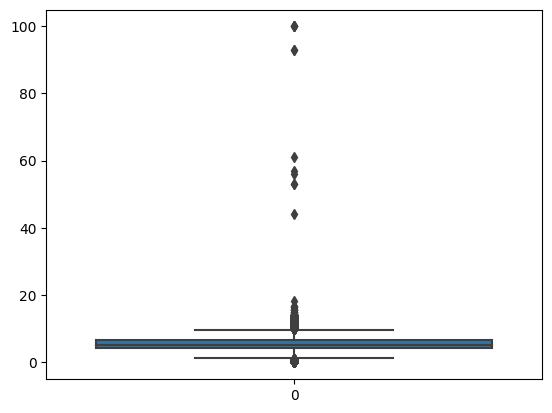

In [66]:
sns.boxplot(df.fuel_consumption);

In [67]:
df[df.fuel_consumption>20]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
265,Mercedes-Benz A 180,Mercedes-Benz,A 180,NL,32750.0,Compact,Used,5.0,Spain,Yes,49444.0,Automatic,benzine,Silver,Metallic,Dealer,5.0,7.0,99.500000,Front,4.0,99.9,Basic,Standard,21.0,5.0,1265.0,Yes,No,6.0,Part leather,2.0,low_efficiency,136.0,2.0
1771,Mercedes-Benz E 200,Mercedes-Benz,E 200,DE,22480.0,Station wagon,Used,4.0,Germany,No,87036.0,Automatic,benzine,Black,Metallic,Dealer,5.0,7.0,142.000000,Rear,4.0,61.0,Basic,Standard,18.0,5.0,1735.0,Yes,Yes,6.0,Part leather,2.0,high_efficiency,184.0,8.0
6580,Renault Megane,Renault,Megane,DE,17488.0,Station wagon,Used,5.0,Germany,No,24577.0,Manual,benzine,Beige,Metallic,Dealer,5.0,6.0,178.000000,Front,4.0,57.0,Basic,Standard,14.0,3.0,1362.0,No,No,6.0,Part leather,1.0,low_efficiency,140.0,3.0
18546,Toyota Yaris,Toyota,Yaris,DE,17490.0,Sedan,Used,5.0,Germany,Yes,15.0,Manual,benzine,White,Nonmetallic,Dealer,5.0,6.0,75.000000,Front,3.0,56.0,Basic,Standard,17.0,1.0,1100.0,No,No,6.0,Cloth,1.0,high_efficiency,72.0,0.0
18798,Nissan Qashqai,Nissan,Qashqai,NL,21995.0,Compact,Used,5.0,Spain,Yes,57706.0,Manual,benzine,White,Nonmetallic,Dealer,5.0,6.0,129.000000,Front,4.0,99.9,Basic,Standard,22.0,3.0,1275.0,Yes,No,6.0,Part leather,2.0,high_efficiency,141.0,3.0
18799,Nissan Qashqai,Nissan,Qashqai,NL,19595.0,Compact,Used,5.0,Spain,Yes,60888.0,Manual,benzine,Black,Metallic,Dealer,5.0,6.0,129.000000,Front,4.0,99.9,Basic,Standard,19.0,2.0,1250.0,Yes,No,6.0,Full leather,2.0,high_efficiency,116.0,5.0
19904,Nissan Qashqai,Nissan,Qashqai,BE,15400.0,Off-Road/Pick-up,Used,5.0,Belgium,Yes,101361.0,Manual,diesel,Brown,Metallic,Dealer,5.0,6.0,129.000000,Front,4.0,44.0,Basic,Standard,20.0,6.0,1365.0,Yes,Yes,6.0,Cloth,1.0,high_efficiency,110.0,5.0
20995,Ford Focus,Ford,Focus,NL,16595.0,Compact,Used,5.0,Germany,Yes,99112.0,Manual,diesel,Black,Metallic,Dealer,5.0,6.0,125.000000,Front,4.0,93.0,Basic,Standard,20.0,5.0,1263.0,Yes,No,6.0,Cloth,2.0,high_efficiency,120.0,4.0
21012,Ford Focus,Ford,Focus,NL,16900.0,Compact,Used,5.0,Germany,Yes,126742.0,Manual,diesel,Grey,Nonmetallic,Dealer,5.0,6.0,125.000000,Front,4.0,93.0,Basic,Standard,18.0,4.0,1263.0,Yes,No,6.0,Cloth,2.0,high_efficiency,120.0,3.0
23004,Ford Focus,Ford,Focus,DE,21990.0,Sedan,Used,5.0,Germany,Yes,75353.0,Automatic,diesel,Red,Metallic,Dealer,5.0,6.0,125.000000,Front,3.0,99.9,Basic,Standard,17.0,3.0,1388.0,No,Yes,6.0,Cloth,2.0,high_efficiency,120.0,3.0


In [68]:
for group in list(df.loc[df.fuel_consumption>20,'make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['fuel_consumption'].mode())
    if mode != []:
        df.loc[cond, 'fuel_consumption'] = df[cond]['fuel_consumption'].mode()[0]
    #else:
        #df.loc[cond, 'gears'] = df['gears'].mode()[0]

### safety_security

In [69]:
df.loc[(df.cylinders==1)]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age


In [70]:
df.safety_security.value_counts()

safety_security
8.0     1376
9.0     1283
7.0     1251
14.0    1200
13.0    1190
11.0    1161
10.0    1141
12.0    1105
15.0    1097
16.0    1080
17.0     977
18.0     944
6.0      911
19.0     870
22.0     853
21.0     812
23.0     793
20.0     756
1.0      729
24.0     726
25.0     704
26.0     650
5.0      549
4.0      447
3.0      364
27.0     348
28.0     245
2.0      232
30.0     156
29.0     136
31.0      54
32.0      21
34.0      18
33.0      12
36.0       1
35.0       1
Name: count, dtype: int64

<Axes: >

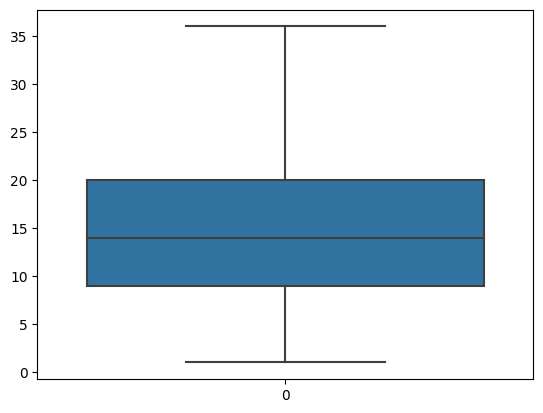

In [71]:
sns.boxplot(df.safety_security)

In [72]:
def categorize_safety(number):
    if  number <= 12:
        return 'low'
    elif 13 <= number <= 24:
        return 'middle'
    else:
        return 'high'

In [73]:
df['safety_category'] = df.safety_security.apply(categorize_safety)

In [74]:
df.drop('safety_security',axis=1, inplace=True)

### extras

In [75]:
df.extras.value_counts()

extras
1.0     6755
2.0     2885
3.0     2605
4.0     2181
5.0     1934
6.0     1497
7.0     1406
8.0     1074
9.0      975
10.0     819
11.0     607
12.0     505
13.0     342
14.0     242
15.0     185
16.0      96
17.0      49
18.0      23
19.0      10
20.0       2
26.0       1
Name: count, dtype: int64

In [76]:
df.comfort_convenience.value_counts()

comfort_convenience
Basic        23924
Standard       168
Mid-range       86
Top             15
Name: count, dtype: int64

### empty_weight

In [77]:
df.empty_weight.sort_values(ascending=False)

6869     15590.0
21142    11246.0
20037     2900.0
5414      2750.0
17891     2725.0
          ...   
10626      600.0
9628       600.0
9632       600.0
4188       525.0
13995       75.0
Name: empty_weight, Length: 24193, dtype: float64

<Axes: >

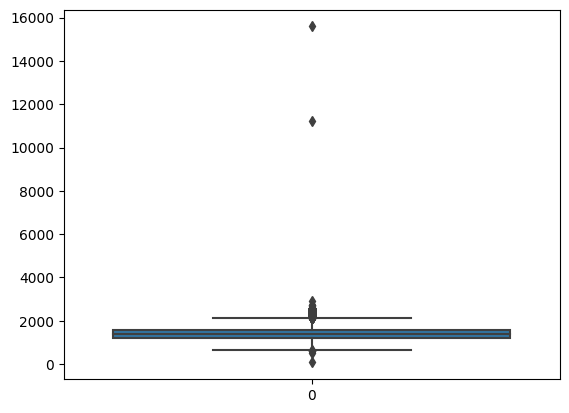

In [78]:
sns.boxplot(df.empty_weight)

In [79]:
df[df.empty_weight>4000]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age,safety_category
6869,Renault ZOE,Renault,ZOE,DE,16590.0,Sedan,Used,5.0,Germany,Yes,24482.0,Automatic,electric,White,Nonmetallic,Dealer,5.0,1.0,135.986470,Front,0.0,5.0,Basic,Standard,1.0,15590.0,Yes,Yes,6.0,Cloth,1.0,high_efficiency,58.0,3.0,low
21142,Ford Fiesta,Ford,Fiesta,DE,20980.0,Compact,Employee's car,5.0,Germany,Yes,17724.0,Manual,benzine,Grey,Metallic,Dealer,5.0,6.0,135.448052,Front,3.0,4.3,Basic,Standard,9.0,11246.0,Yes,Yes,6.0,Cloth,1.0,high_efficiency,125.0,1.0,middle


In [80]:
df.loc[(df.empty_weight>4000)&(df.make_model == 'Renault ZOE'),'empty_weight'] = 1577

In [81]:
df.loc[(df.empty_weight>4000)&(df.make_model == 'Ford Fiesta'),'empty_weight'] = 1217

In [82]:
df[df.empty_weight<850].make_model.value_counts()

make_model
Renault Twingo         49
Toyota Aygo            25
Peugeot 108            21
Peugeot 107            17
SEAT Mii               14
Fiat                   11
Skoda Citigo           10
Fiat 500                9
Fiat Panda              7
Renault Spider          7
Renault Alpine A310     6
Ford Ka/Ka+             5
Fiat 126                4
Toyota iQ               4
Nissan Figaro           3
Peugeot 106             3
Fiat Seicento           2
Peugeot 309             2
Fiat Uno                2
Skoda Enyaq             1
Nissan Micra            1
Toyota Starlet          1
Toyota Yaris            1
Opel Astra              1
SEAT Marbella           1
Renault Super 5         1
Peugeot 205             1
SEAT Ibiza              1
Fiat 850                1
Opel Tigra              1
Fiat Punto              1
Opel Speedster          1
Name: count, dtype: int64

In [83]:
mask = df['empty_weight'] < 850

# Apply winsorize only to the selected values
df.loc[mask, 'empty_weight'] = winsorize(df.loc[mask, 'empty_weight'], (len(df[mask]) / len(df), None))

In [84]:
#df.loc[df['empty_weight'] <850, 'empty_weight']= winsorize(df["empty_weight"],(len(df.empty_weight[df.empty_weight<850]) / len(df),None),inplace=True)

In [85]:
df[df.empty_weight>2850]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age,safety_category
20037,Nissan NV300,Nissan,NV300,DE,36990.0,Station wagon,Used,4.0,Germany,No,14750.0,Manual,diesel,Blue,Metallic,Dealer,9.0,6.0,149.0,Front,4.0,5.8,Basic,Standard,2.0,2900.0,No,Yes,6.0,Cloth,1.0,high_efficiency,145.0,2.0,low


In [86]:
df = df[~(df.empty_weight>2850)]

### emission_class 

In [87]:
df.emission_class.value_counts()

emission_class
6.0    18069
5.0     2729
4.0     2060
3.0      647
2.0      369
1.0      318
Name: count, dtype: int64

<Axes: >

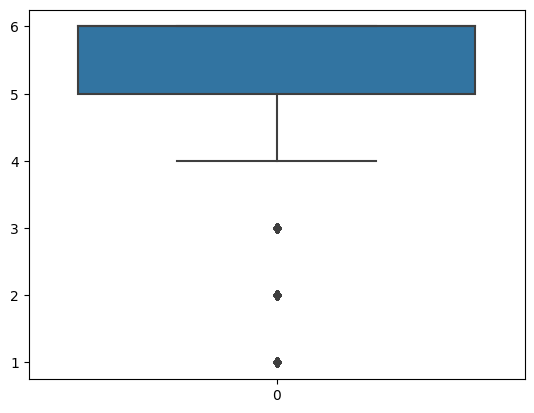

In [88]:
sns.boxplot(df.emission_class)

In [89]:
df[df.emission_class<4]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age,safety_category
443,Mercedes-Benz 500,Mercedes-Benz,500,DE,20950.0,Convertible,Used,2.0,Spain,No,110000.0,Automatic,benzine,Black,Metallic,Dealer,2.0,4.0,124.000000,Rear,8.0,0.0,Basic,Standard,2.0,2080.0,No,No,3.0,Full leather,3.0,high_efficiency,326.0,31.0,low
487,Mercedes-Benz SL 300,Mercedes-Benz,SL 300,BE,14990.0,Convertible,Used,2.0,Germany,No,205491.0,Automatic,benzine,Green,Nonmetallic,Dealer,2.0,1.0,0.500000,Rear,6.0,5.0,Basic,Standard,1.0,1530.0,No,No,2.0,Full leather,3.0,high_efficiency,190.0,31.0,low
538,Mercedes-Benz SL 300,Mercedes-Benz,SL 300,BE,32500.0,Convertible,Used,2.0,Germany,No,235964.0,Automatic,benzine,Red,Nonmetallic,Dealer,5.0,4.0,0.500000,Rear,6.0,5.0,Basic,Standard,1.0,1530.0,No,No,2.0,Full leather,3.0,high_efficiency,188.0,35.0,low
540,Mercedes-Benz SLK 230,Mercedes-Benz,SLK 230,DE,6666.0,Convertible,Used,3.0,Germany,No,152300.0,Automatic,benzine,Black,Metallic,Dealer,2.0,5.0,132.626915,Rear,4.0,9.3,Basic,Standard,1.0,1285.0,No,No,2.0,Full leather,4.0,high_efficiency,193.0,24.0,low
542,Mercedes-Benz SLK 230,Mercedes-Benz,SLK 230,DE,11980.0,Convertible,Used,2.0,Germany,Yes,58389.0,Automatic,benzine,Blue,Metallic,Dealer,2.0,5.0,132.626915,Rear,4.0,9.3,Basic,Standard,3.0,1285.0,No,Yes,2.0,Full leather,1.0,high_efficiency,193.0,23.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28573,Volvo S80,Volvo,S80,NL,3450.0,Sedan,Used,4.0,Spain,No,301784.0,Manual,benzine,Blue,Metallic,Dealer,5.0,5.0,167.000000,Front,5.0,8.6,Basic,Standard,2.0,1472.0,Yes,No,3.0,Cloth,3.0,high_efficiency,141.0,21.0,low
28596,Volvo S60,Volvo,S60,IT,3900.0,Sedan,Used,4.0,Italy,Yes,207839.0,Manual,diesel,Grey,Metallic,Dealer,5.0,5.0,171.000000,Front,5.0,6.5,Basic,Standard,1.0,1680.0,Yes,Yes,3.0,Part leather,2.0,high_efficiency,163.0,19.0,low
28614,Volvo 960,Volvo,960,NL,17900.0,Sedan,Used,4.0,Netherlands,No,137780.0,Automatic,benzine,Violet,Metallic,Dealer,5.0,6.0,124.000000,Front,6.0,0.0,Basic,Standard,2.0,1648.0,No,No,2.0,Full leather,2.0,high_efficiency,204.0,26.0,low
28615,Volvo 960,Volvo,960,DE,8990.0,Sedan,Used,4.0,Germany,No,108000.0,Automatic,benzine,Green,Metallic,Dealer,5.0,6.0,124.000000,Front,6.0,0.0,Basic,Standard,2.0,1453.0,Yes,Yes,2.0,Velour,1.0,high_efficiency,204.0,30.0,low


In [90]:
mapping = {1: 'low', 2: 'low', 3: 'low', 4: 'mid-low', 5: 'mid', 6: 'high'}

df.loc[:, 'emission_category'] = df['emission_class'].map(mapping)

df.loc[:, 'emission_category'] = pd.Categorical(df['emission_category'], 
                                          categories=['low', 'mid-low', 'mid', 'high'], 
                                          ordered=True)

In [91]:
df.emission_category.value_counts(dropna=False)

emission_category
high       18069
mid         2729
mid-low     2060
low         1334
Name: count, dtype: int64

In [92]:
df.drop('emission_class',axis=1,inplace=True)

### previous_owner

In [93]:
df.previous_owner.value_counts()

previous_owner
1.0     15886
2.0      6089
3.0      1452
4.0       396
5.0       160
6.0        81
7.0        54
8.0        47
9.0        19
12.0        4
10.0        2
14.0        1
13.0        1
Name: count, dtype: int64

<Axes: >

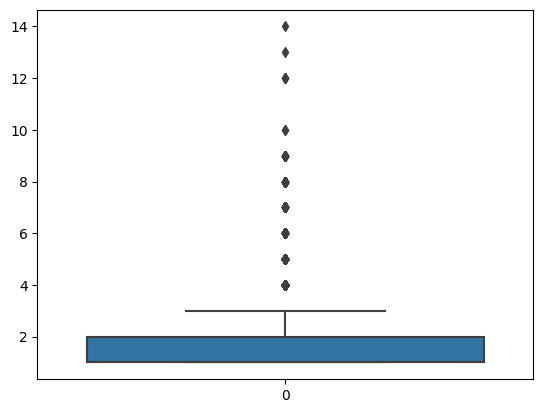

In [94]:
sns.boxplot(df.previous_owner)

In [95]:
df[df.previous_owner>5]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,extras,empty_weight,full_service_history,nonsmoker_vehicle,upholstery,previous_owner,energy_efficiency_class,power_hp,age,safety_category,emission_category
96,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,NL,72500.0,Compact,Used,5.0,Spain,Yes,34766.0,Automatic,benzine,Black,Metallic,Dealer,5.0,7.0,162.0,4WD,4.0,8.9,Standard,Standard,1.0,1535.0,Yes,No,Part leather,6.0,low_efficiency,421.0,2.0,low,high
97,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,ES,66990.0,Compact,Used,5.0,Spain,Yes,48000.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,8.0,162.0,4WD,4.0,8.4,Basic,Standard,1.0,1555.0,No,No,Full leather,6.0,low_efficiency,421.0,2.0,low,high
101,Mercedes-Benz AMG GT,Mercedes-Benz,AMG GT,NL,80000.0,Compact,Used,5.0,Germany,Yes,20133.0,Automatic,benzine,Grey,Metallic,Dealer,4.0,9.0,219.0,4WD,6.0,9.8,Basic,Standard,6.0,1940.0,Yes,No,Full leather,6.0,low_efficiency,367.0,2.0,middle,high
201,Mercedes-Benz A 180,Mercedes-Benz,A 180,NL,17950.0,Compact,Used,5.0,Spain,No,132111.0,Automatic,benzine,Black,Metallic,Dealer,5.0,7.0,99.5,Front,4.0,3.9,Basic,Standard,7.0,1295.0,No,No,Part leather,6.0,low_efficiency,122.0,8.0,middle,high
236,Mercedes-Benz A 180,Mercedes-Benz,A 180,NL,13845.0,Compact,Used,5.0,Spain,No,123617.0,Manual,diesel,Grey,Metallic,Dealer,5.0,6.0,99.5,Front,4.0,3.9,Basic,Standard,3.0,1285.0,No,No,Part leather,6.0,low_efficiency,109.0,8.0,middle,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27850,Volvo 945,Volvo,945,IT,5900.0,Station wagon,Used,5.0,Germany,Yes,169000.0,Manual,lpg/cng,Blue,Metallic,Dealer,5.0,5.0,124.0,Rear,4.0,10.2,Basic,Standard,1.0,1320.0,Yes,No,Cloth,12.0,high_efficiency,155.0,25.0,low,low
28197,Volvo V70,Volvo,V70,NL,5950.0,Station wagon,Used,5.0,Germany,Yes,344795.0,Automatic,diesel,Black,Metallic,Dealer,5.0,6.0,111.0,Front,5.0,7.4,Basic,Standard,3.0,1607.0,Yes,No,Full leather,7.0,high_efficiency,185.0,15.0,middle,mid-low
28374,Volvo S80,Volvo,S80,ES,7990.0,Sedan,Used,5.0,Spain,Yes,249000.0,Automatic,diesel,Grey,Metallic,Dealer,5.0,6.0,167.0,Front,5.0,11.9,Basic,Standard,1.0,1710.0,No,No,Full leather,7.0,high_efficiency,179.0,15.0,low,mid-low
28401,Volvo S70,Volvo,S70,ES,2699.0,Sedan,Used,4.0,Spain,Yes,241764.0,Manual,benzine,Blue,Nonmetallic,Dealer,5.0,5.0,168.0,Front,5.0,6.3,Basic,Standard,1.0,1370.0,No,No,Part leather,12.0,high_efficiency,126.0,25.0,low,high


<Axes: xlabel='previous_owner', ylabel='age'>

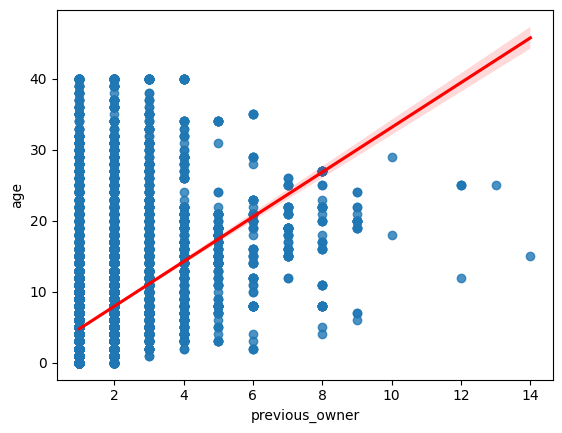

In [96]:
sns.regplot(x=df.previous_owner,y=df.age,scatter=True, ci=95, line_kws={"color": "red"})

In [97]:
df.previous_owner.corr(df.age)

0.41221615866279965

In [98]:
df.drop('previous_owner', axis=1, inplace=True)

### power_hp

<Axes: >

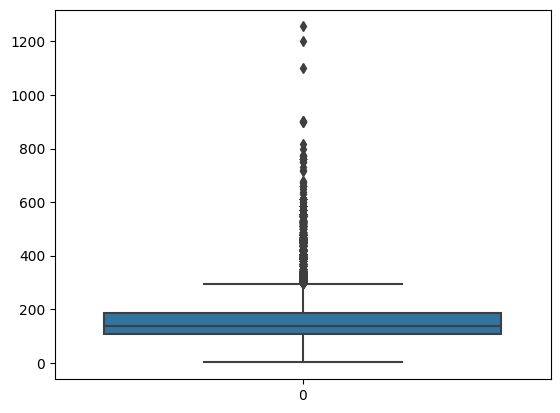

In [99]:
sns.boxplot(df.power_hp)

In [100]:
df.power_hp.describe()

count    24192.000000
mean       161.383763
std         90.901034
min          1.000000
25%        109.000000
50%        136.000000
75%        184.000000
max       1256.000000
Name: power_hp, dtype: float64

In [101]:
df[df.power_hp>500]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,extras,empty_weight,full_service_history,nonsmoker_vehicle,upholstery,energy_efficiency_class,power_hp,age,safety_category,emission_category
113,Mercedes-Benz AMG GT,Mercedes-Benz,AMG GT,AT,80000.0,Compact,Used,3.0,Austria,Yes,42000.0,Automatic,benzine,Red,Metallic,Dealer,2.0,7.0,219.0,Rear,8.0,9.6,Basic,Standard,5.0,1645.0,Yes,Yes,alcantara,low_efficiency,510.0,7.0,middle,high
421,Mercedes-Benz AMG GT,Mercedes-Benz,AMG GT,BE,80000.0,Convertible,Used,3.0,Germany,No,22770.0,Automatic,benzine,Black,Nonmetallic,Dealer,2.0,7.0,219.0,4WD,8.0,11.4,Basic,Standard,2.0,1735.0,No,No,Full leather,low_efficiency,557.0,4.0,low,high
422,Mercedes-Benz AMG GT,Mercedes-Benz,AMG GT,DE,80000.0,Convertible,Used,3.0,Germany,No,8800.0,Automatic,benzine,Black,Nonmetallic,Dealer,2.0,7.0,219.0,4WD,8.0,12.5,Basic,Standard,6.0,1735.0,Yes,Yes,Full leather,low_efficiency,557.0,4.0,low,high
423,Mercedes-Benz SL 65 AMG,Mercedes-Benz,SL 65 AMG,ES,48900.0,Convertible,Used,2.0,Spain,Yes,106000.0,Automatic,benzine,Grey,Nonmetallic,Dealer,2.0,6.0,332.0,Front,4.0,15.1,Basic,Standard,16.0,1395.0,No,No,Full leather,low_efficiency,612.0,16.0,middle,mid-low
426,Mercedes-Benz AMG GT,Mercedes-Benz,AMG GT,DE,80000.0,Convertible,Used,3.0,Germany,Yes,23851.0,Automatic,benzine,Grey,Metallic,Dealer,2.0,7.0,219.0,4WD,8.0,11.5,Basic,Standard,10.0,1700.0,Yes,Yes,Full leather,low_efficiency,522.0,3.0,high,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21843,Ford Mustang,Ford,Mustang,ES,80000.0,Coupe,Used,2.0,Spain,Yes,8500.0,Manual,benzine,Black,Nonmetallic,Dealer,4.0,6.0,276.0,Rear,8.0,12.0,Basic,Standard,1.0,1659.0,No,No,Full leather,low_efficiency,533.0,3.0,low,high
21852,Ford Mustang,Ford,Mustang,ES,80000.0,Coupe,Used,2.0,Spain,Yes,30000.0,Manual,benzine,Black,Nonmetallic,Dealer,4.0,6.0,276.0,Rear,8.0,12.0,Basic,Standard,1.0,1659.0,No,No,Full leather,low_efficiency,533.0,3.0,low,high
21915,Ford Mustang,Ford,Mustang,ES,46500.0,Coupe,Used,2.0,Spain,Yes,50900.0,Manual,benzine,Black,Nonmetallic,Dealer,4.0,6.0,276.0,Rear,8.0,12.0,Basic,Standard,1.0,1659.0,No,No,Full leather,low_efficiency,551.0,13.0,low,high
21916,Ford Mustang,Ford,Mustang,ES,80000.0,Coupe,Used,2.0,Spain,Yes,12000.0,Automatic,benzine,Red,Nonmetallic,Dealer,4.0,6.0,276.0,Rear,8.0,12.0,Basic,Standard,1.0,1659.0,No,No,Full leather,low_efficiency,760.0,1.0,low,high


In [102]:
df = df[~(df.power_hp>500)]

In [103]:
df[df.power_hp>400]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,extras,empty_weight,full_service_history,nonsmoker_vehicle,upholstery,energy_efficiency_class,power_hp,age,safety_category,emission_category
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,ES,69900.0,Compact,Used,5.0,Spain,Yes,18900.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,8.0,162.0,4WD,4.0,8.4,Basic,Standard,1.0,1555.0,No,No,Full leather,low_efficiency,421.0,2.0,low,high
26,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,ES,67900.0,Compact,Used,5.0,Spain,Yes,6564.0,Automatic,benzine,White,Nonmetallic,Dealer,5.0,8.0,162.0,4WD,4.0,8.4,Basic,Standard,1.0,1555.0,No,No,Full leather,low_efficiency,421.0,1.0,low,high
72,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,BE,64999.0,Compact,Used,5.0,Spain,No,30273.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,7.0,162.0,4WD,4.0,8.4,Basic,Standard,1.0,1555.0,No,No,Full leather,low_efficiency,421.0,2.0,low,high
92,Mercedes-Benz AMG GT,Mercedes-Benz,AMG GT,NL,80000.0,Compact,Used,5.0,Germany,No,50264.0,Automatic,benzine,Grey,Metallic,Dealer,4.0,9.0,219.0,4WD,6.0,9.1,Basic,Standard,6.0,1945.0,Yes,Yes,Full leather,low_efficiency,435.0,2.0,middle,high
95,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,ES,74990.0,Compact,Used,5.0,Spain,Yes,60000.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,8.0,162.0,4WD,4.0,8.4,Basic,Standard,1.0,1555.0,No,No,Full leather,low_efficiency,421.0,2.0,low,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28331,Volvo S90,Volvo,S90,DE,54900.0,Sedan,Used,4.0,Germany,Yes,32000.0,Automatic,electric,Grey,Metallic,Dealer,5.0,8.0,127.0,4WD,4.0,2.0,Basic,Standard,12.0,1892.0,Yes,Yes,Full leather,high_efficiency,408.0,4.0,high,high
28355,Volvo S90,Volvo,S90,DE,57900.0,Sedan,Used,4.0,Germany,Yes,75000.0,Automatic,electric,Grey,Metallic,Dealer,5.0,8.0,127.0,4WD,4.0,4.8,Basic,Standard,14.0,1892.0,Yes,Yes,Full leather,high_efficiency,420.0,4.0,high,high
28414,Volvo S90,Volvo,S90,DE,49750.0,Sedan,Used,4.0,Germany,Yes,17918.0,Automatic,benzine,Black,Metallic,Dealer,5.0,8.0,127.0,4WD,4.0,2.0,Basic,Standard,10.0,2076.0,Yes,Yes,Full leather,high_efficiency,408.0,3.0,high,high
28458,Volvo S90,Volvo,S90,BE,44750.0,Sedan,Used,4.0,Spain,No,85000.0,Automatic,electric,Black,Metallic,Private seller,5.0,8.0,127.0,4WD,4.0,2.0,Basic,Standard,15.0,2095.0,Yes,No,alcantara,high_efficiency,407.0,5.0,high,high


In [104]:
df.loc[df['power_hp']>400, 'power_hp'] = winsorize(df["power_hp"],(None, len(df.power_hp[df.power_hp > 400]) / len(df)),inplace=True)

<Axes: >

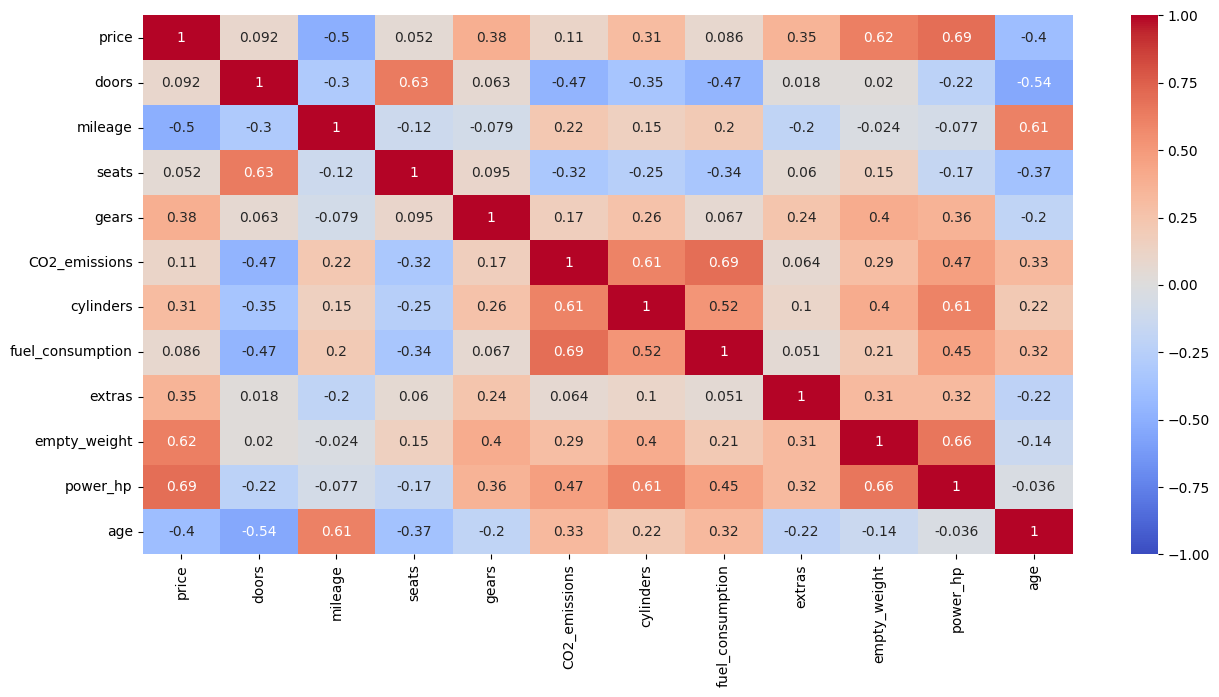

In [105]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, center=0, vmin=-1, vmax=1)

In [106]:
df.drop(['doors','seats','CO2_emissions','fuel_consumption','age','cylinders','empty_weight'], axis=1, inplace=True)

# Categorical Features

In [107]:
df.drop(['make','model'], axis=1, inplace=True)

In [108]:
df.groupby('location')['price'].mean()

location
AT    17927.751812
BE    22724.779499
BG    25500.000000
DE    25591.632918
DK    18500.000000
EE    29500.000000
ES    19400.664620
FR    20719.480414
IT    16844.285649
LU    22106.606061
NL    13438.748405
Name: price, dtype: float64

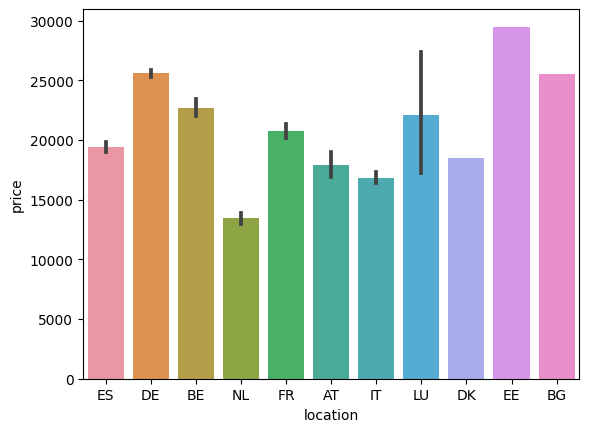

In [109]:
sns.barplot(y='price', x='location', data=df);

In [110]:
df[df['location'].isin(['EE', 'DK', 'BG'])]

,make_model,location,price,body_type,type,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,gears,drivetrain,comfort_convenience,entertainment_media,extras,full_service_history,nonsmoker_vehicle,upholstery,energy_efficiency_class,power_hp,safety_category,emission_category
7695,Peugeot 205,DK,18500.0,Convertible,Used,France,No,199500.0,Manual,benzine,Black,Nonmetallic,Private seller,5.0,Front,Basic,Standard,3.0,No,No,Cloth,high_efficiency,147.0,low,low
17302,Toyota Supra,EE,29500.0,Coupe,Used,Germany,No,147744.0,Automatic,benzine,Grey,Metallic,Private seller,5.0,Rear,Basic,Standard,3.0,No,No,Full leather,low_efficiency,224.0,low,high
21930,Ford Mustang,BG,25500.0,Coupe,Used,Spain,No,79333.0,Automatic,benzine,Grey,Metallic,Private seller,6.0,Rear,Basic,Standard,6.0,No,Yes,Full leather,low_efficiency,290.0,middle,high


In [111]:
df = df[~(df['location'].isin(['EE', 'DK', 'BG']))]

### body_type

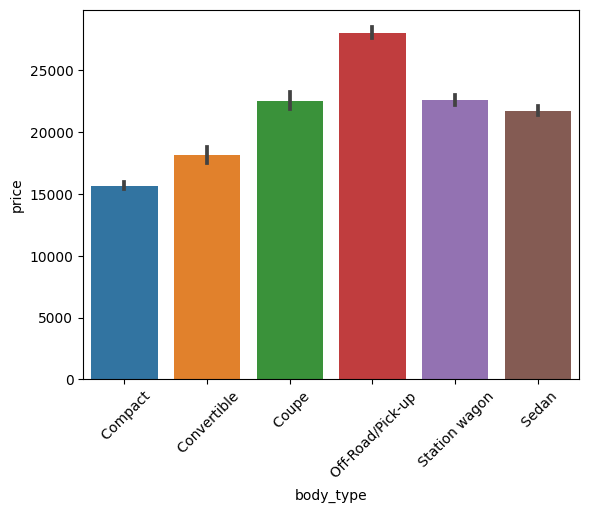

In [112]:
sns.barplot(y='price', x='body_type', data=df)
plt.xticks(rotation=45);

In [113]:
### type

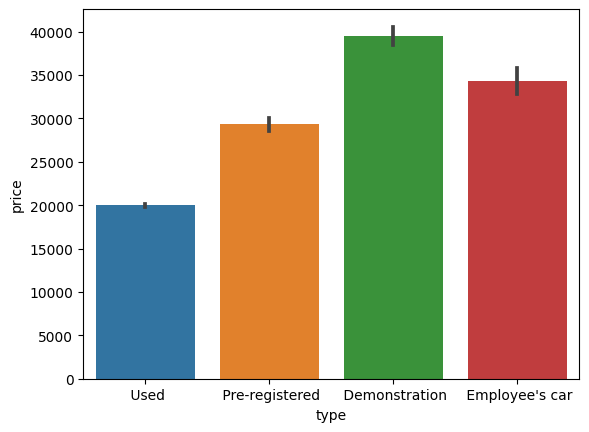

In [114]:
sns.barplot(y='price', x='type', data=df);

### country_version

In [115]:
df.drop('country_version', axis=1, inplace=True)

### warranty

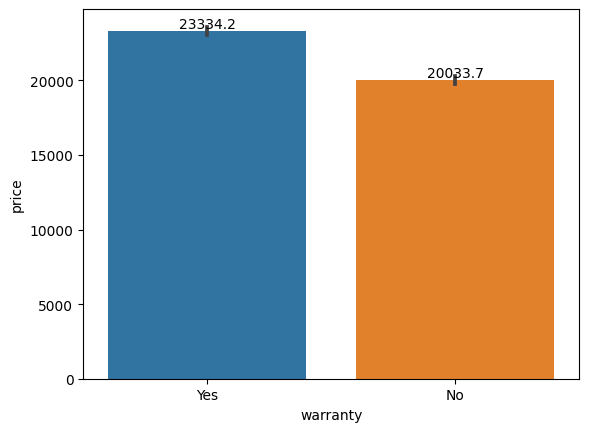

In [116]:
ax = sns.barplot(y='price', x='warranty', data=df)
for container in ax.containers:
    ax.bar_label(container);

### gearbox

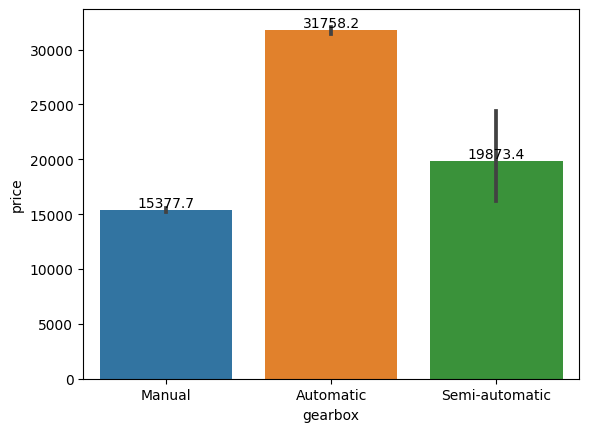

In [117]:
ax = sns.barplot(y='price', x='gearbox', data=df)
for container in ax.containers:
    ax.bar_label(container);

### fuel_type

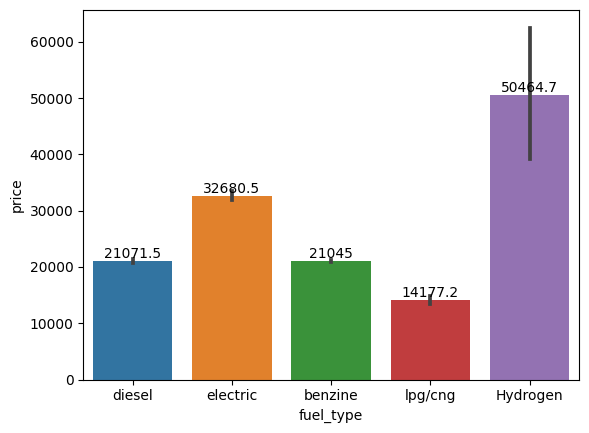

In [118]:
ax = sns.barplot(y='price', x='fuel_type', data=df)
for container in ax.containers:
    ax.bar_label(container);

### colour

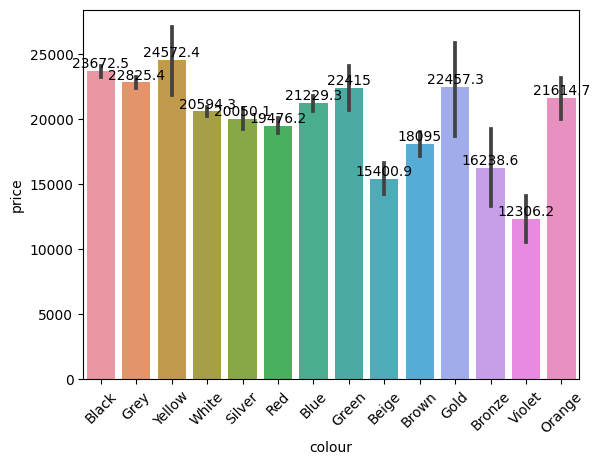

In [119]:
ax = sns.barplot(y='price', x='colour', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

In [120]:
df.colour.value_counts()

colour
Black     5774
Grey      5668
White     4633
Blue      2913
Red       1897
Silver    1363
Brown      418
Green      397
Orange     263
Beige      224
Yellow     207
Violet      93
Bronze      61
Gold        40
Name: count, dtype: int64

### paint

In [121]:
df.paint.value_counts()

paint
Metallic       13044
Nonmetallic    10906
Uni/Basic          1
Name: count, dtype: int64

In [122]:
df.loc[df['paint']=='Uni/Basic','paint'] = 'Nonmetallic' 

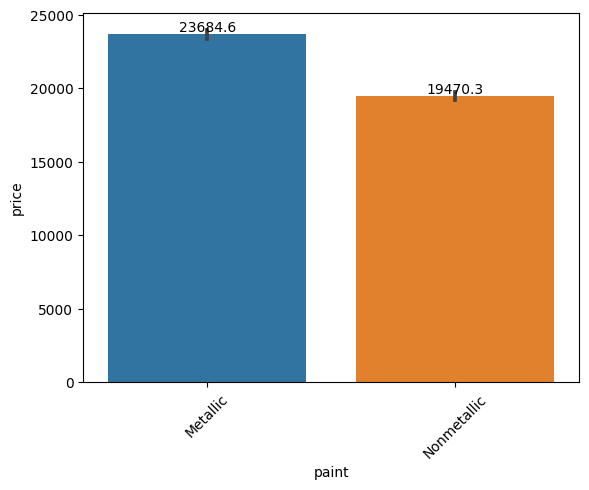

In [123]:
ax = sns.barplot(y='price', x='paint', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

### seller

In [124]:
df.seller.value_counts()

seller
Dealer            21952
Private seller     1999
Name: count, dtype: int64

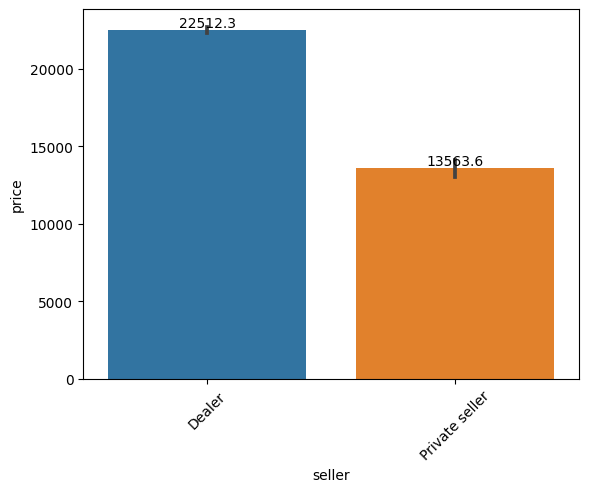

In [125]:
ax = sns.barplot(y='price', x='seller', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

### drivetrain

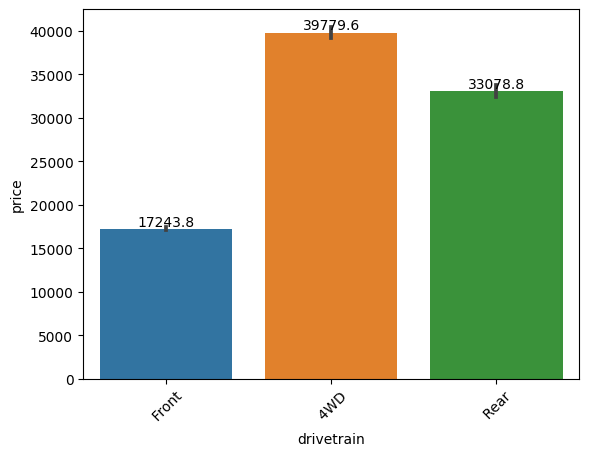

In [126]:
ax = sns.barplot(y='price', x='drivetrain', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

### comfort_convenience

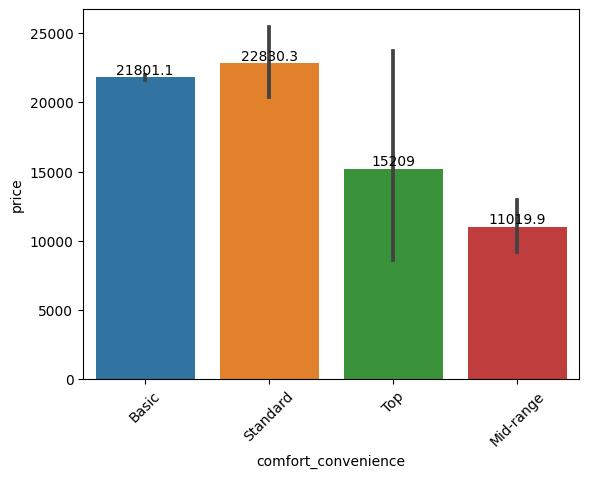

In [127]:
ax = sns.barplot(y='price', x='comfort_convenience', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

In [128]:
df.drop('comfort_convenience',axis = 1, inplace=True)


### entertainment_media

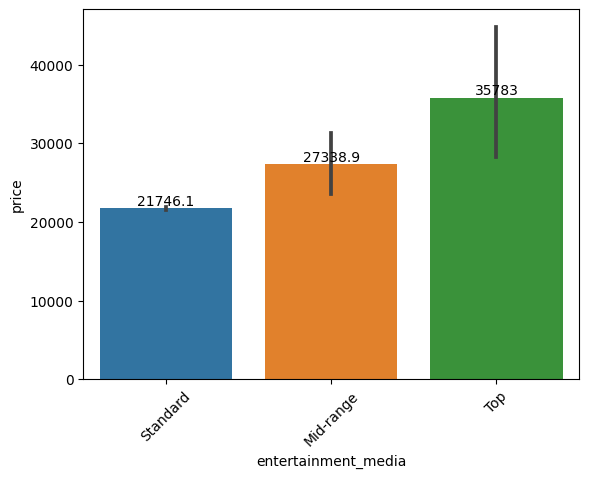

In [129]:
ax = sns.barplot(y='price', x='entertainment_media', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

### full_service_history 

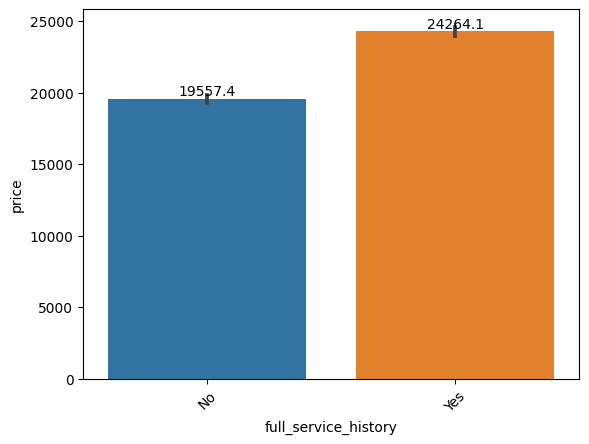

In [130]:
ax = sns.barplot(y='price', x='full_service_history', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

### nonsmoker_vehicle

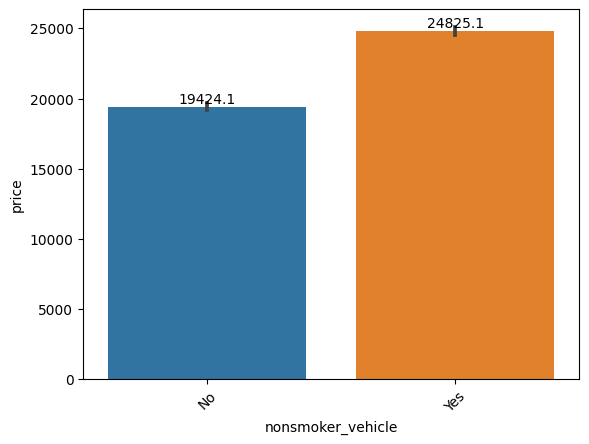

In [131]:
ax = sns.barplot(y='price', x='nonsmoker_vehicle', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

### upholstery

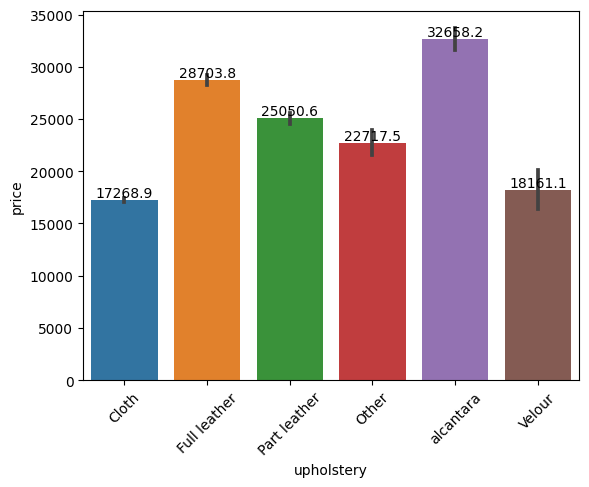

In [132]:
ax = sns.barplot(y='price', x='upholstery', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

In [133]:
df.upholstery.value_counts()

upholstery
Cloth           13296
Full leather     5995
Part leather     3097
alcantara         749
Other             613
Velour            201
Name: count, dtype: int64

In [134]:
maps = {'Cloth':'Cloth','Full leather':'Leather', 
        'Part leather':'Leather', 'alcantara':'Alcantara',
        'Other':'Other','Velour':'Other'}

In [135]:
df['upholstery'] = df['upholstery'].map(maps)

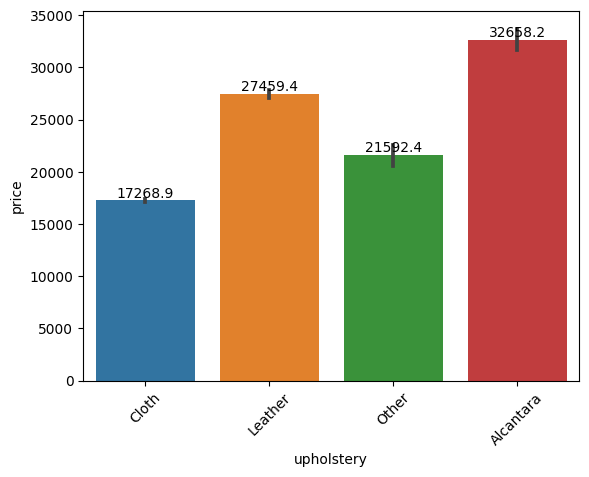

In [136]:
ax = sns.barplot(y='price', x='upholstery', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

### energy_efficiency_class

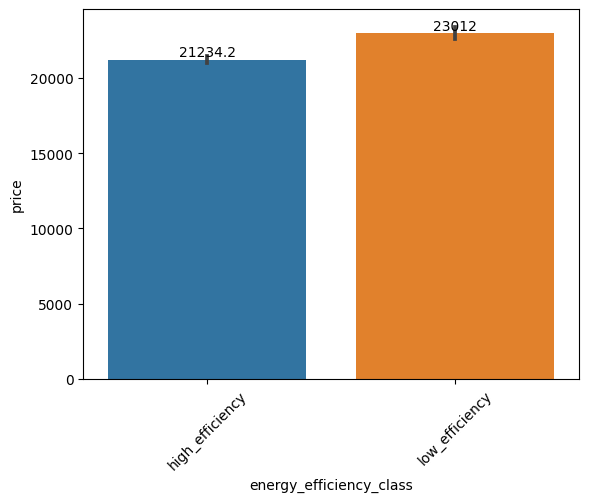

In [137]:
ax = sns.barplot(y='price', x='energy_efficiency_class', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

In [138]:
df.drop('energy_efficiency_class',axis = 1, inplace=True)

In [139]:
df.drop_duplicates(inplace=True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23756 entries, 0 to 28629
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            23756 non-null  object 
 1   location              23756 non-null  object 
 2   price                 23756 non-null  float64
 3   body_type             23756 non-null  object 
 4   type                  23756 non-null  object 
 5   warranty              23756 non-null  object 
 6   mileage               23756 non-null  float64
 7   gearbox               23756 non-null  object 
 8   fuel_type             23756 non-null  object 
 9   colour                23756 non-null  object 
 10  paint                 23756 non-null  object 
 11  seller                23756 non-null  object 
 12  gears                 23756 non-null  float64
 13  drivetrain            23756 non-null  object 
 14  entertainment_media   23756 non-null  object 
 15  extras                23

## Export dataframe to csv file (without dummy)

In [141]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

In [142]:
df_dummy = pd.get_dummies(df, drop_first=True,dtype=int)
df_dummy

,price,mileage,gears,extras,power_hp,make_model_Dacia Break,make_model_Dacia Dokker,make_model_Dacia Duster,make_model_Dacia Jogger,make_model_Dacia Lodgy,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat,make_model_Fiat 124 Coupè,make_model_Fiat 124 Spider,make_model_Fiat 126,make_model_Fiat 127,make_model_Fiat 128,make_model_Fiat 130,make_model_Fiat 131,make_model_Fiat 500,make_model_Fiat 500 Abarth,make_model_Fiat 500C,make_model_Fiat 500L,make_model_Fiat 500X,make_model_Fiat 500e,make_model_Fiat 595 Abarth,make_model_Fiat 850,make_model_Fiat Barchetta,make_model_Fiat Brava,make_model_Fiat Bravo,make_model_Fiat Coupe,make_model_Fiat Croma,make_model_Fiat Dino,make_model_Fiat Doblo,make_model_Fiat Fiorino,make_model_Fiat Freemont,make_model_Fiat Fullback,make_model_Fiat Grande Punto,make_model_Fiat Multipla,make_model_Fiat New Panda,make_model_Fiat Panda,make_model_Fiat Punto,make_model_Fiat Punto Evo,make_model_Fiat Qubo,make_model_Fiat Ritmo,make_model_Fiat Sedici,make_model_Fiat Seicento,make_model_Fiat Spider Europa,make_model_Fiat Stilo,make_model_Fiat Strada,make_model_Fiat Talento,make_model_Fiat Tipo,make_model_Fiat Uno,make_model_Fiat X 1/9,make_model_Ford,make_model_Ford B-Max,make_model_Ford Bronco,make_model_Ford C-Max,make_model_Ford Capri,make_model_Ford Cougar,make_model_Ford EcoSport,make_model_Ford Edge,make_model_Ford Escort,make_model_Ford Explorer,make_model_Ford F 150,make_model_Ford F 250,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Focus CC,make_model_Ford Galaxy,make_model_Ford Gran Torino,make_model_Ford Grand C-Max,make_model_Ford Grand Tourneo,make_model_Ford Ka/Ka+,make_model_Ford Kuga,make_model_Ford M,make_model_Ford Maverick,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Ford Mustang Mach-E,make_model_Ford Probe,make_model_Ford Puma,make_model_Ford Ranger,make_model_Ford Ranger Raptor,make_model_Ford S-Max,make_model_Ford Sierra,make_model_Ford Streetka,make_model_Ford Thunderbird,make_model_Ford Tourneo Connect,make_model_Ford Tourneo Courier,make_model_Ford Tourneo Custom,make_model_Ford Transit,make_model_Ford Transit Connect,make_model_Ford Transit Courier,make_model_Ford Transit Custom,make_model_Hyundai,make_model_Hyundai ACCENT,make_model_Hyundai Atos,make_model_Hyundai BAYON,make_model_Hyundai Coupe,make_model_Hyundai ELANTRA,make_model_Hyundai Excel,make_model_Hyundai Genesis,make_model_Hyundai Genesis Coupe,make_model_Hyundai Getz,make_model_Hyundai Grand Santa Fe,make_model_Hyundai H 350,make_model_Hyundai H-1,make_model_Hyundai IONIQ,make_model_Hyundai KONA,make_model_Hyundai KONA Elektro,make_model_Hyundai Lantra,make_model_Hyundai Matrix,make_model_Hyundai NEXO,make_model_Hyundai S-Coupe,make_model_Hyundai SANTA FE,make_model_Hyundai SONATA,make_model_Hyundai STARIA,make_model_Hyundai TUCSON,make_model_Hyundai Terracan,make_model_Hyundai Tiburon,make_model_Hyundai Trajet,make_model_Hyundai VELOSTER,make_model_Hyundai i10,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Hyundai i40,make_model_Hyundai iX20,make_model_Hyundai iX35,make_model_Mercedes-Benz,make_model_Mercedes-Benz 170,make_model_Mercedes-Benz 190,make_model_Mercedes-Benz 200,make_model_Mercedes-Benz 220,make_model_Mercedes-Benz 230,make_model_Mercedes-Benz 250,make_model_Mercedes-Benz 260,make_model_Mercedes-Benz 280,make_model_Mercedes-Benz 320,make_model_Mercedes-Benz 350,make_model_Mercedes-Benz 450,make_model_Mercedes-Benz 500,make_model_Mercedes-Benz A 140,make_model_Mercedes-Benz A 150,make_model_Mercedes-Benz A 160,make_model_Mercedes-Benz A 180,make_model_Mercedes-Benz A 200,make_model_Mercedes-Benz A 220,make_model_Mercedes-Benz A 250,make_model_Mercedes-Benz A 35 AMG,make_model_Mercedes-Benz A 45 AMG,make_model_Mercedes-Benz AMG GT,make_model_Mercedes-Benz B 180,make_model_Mercedes-Benz B 200,make_model_Mercedes-Benz B 220,make_model_Mercedes-Benz B 250,make_model_Mercedes-Benz C 160,make_model_Mercedes-Benz C 180,make_model_Mercedes-Benz C 200,make_model_Merc

In [143]:
df.shape

(23756, 22)

In [144]:
df_dummy.shape

(23756, 632)

In [147]:
df_dummy_corr_price = df_dummy.corr()[["price"]].drop("price").sort_values(by="price", ascending=False)
df_dummy_corr_price

,price
power_hp,0.693017
gears,0.383240
extras,0.354700
upholstery_Leather,0.295573
drivetrain_ Rear,0.244857
...,...
safety_category_low,-0.318156
upholstery_Cloth,-0.333268
mileage,-0.503355
gearbox_Manual,-0.528196


## Export dataframe to csv file (dummy)

In [149]:
df_dummy.to_csv("final_scout_dummy.csv", index=False)